# **Preferably Run the code in Google Colab**

## **LIBRARIES AND DATA EXPLORATION**

**IMPORT LIBRARIES**

In [ ]:
# Data Handling Libraries
import pandas as pd
import numpy as np
from numpy import where

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Data Preprocessing Libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Dimensionality Reduction Libraries
from sklearn.decomposition import PCA

# Clustering Libraries
from sklearn.cluster import KMeans, DBSCAN
import hdbscan
!pip install gower
from gower import gower_matrix

# Distance Calculation Libraries
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors

# Classification Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Anomaly Detection Libraries
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Clustering Evaluation Metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Geospatial Distance Calculation
from geopy.distance import geodesic

# Find the Execution time Of Each Model
import time

#UMAP
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
import umap

# Anomaly Detection
# Import necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import where

# Sklearn Models for Anomaly Detection
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

#Visualization comparison
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

###**LOAD THE DATASET**

In [ ]:
#Load the Dataset
drug=pd.read_csv('Accidental_Drug_Related_Deaths.csv')
drug.head(5)

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,Injury County,Injury State,Injury Place,Description of Injury,Death City,Death County,Death State,Location,Location if Other,Cause of Death,Manner of Death,Other Significant Conditions,Heroin,Heroin death certificate (DC),Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,NaN,CT,Residence,Used Cocaine,NaN,NaN,NaN,Residence,NaN,Cocaine Toxicity,Accident,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,NaN,CT,Residence,Drug Use,NORWICH,NEW LONDON,NaN,Hospital,NaN,Heroin Toxicity,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,NaN,CT,Residence,Drug Use,MARLBOROUGH,NaN,NaN,Hospital,NaN,Heroin Intoxication,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BALTIC,NEW LONDON,NaN,Residence,NaN,Acute Heroin Intoxication,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,NaN,NaN,Residence,Drug Use,BRIDGEPORT,NaN,NaN,Hospital,NaN,Acute Fentanyl Intoxication,Accident,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"


In [ ]:
drug.shape

(11981, 48)

In [ ]:
drug.dtypes

,0
Date,object
Date Type,object
Age,float64
Sex,object
Race,object
Ethnicity,object
Residence City,object
Residence County,object
Residence State,object
Injury City,object


In [ ]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           11981 non-null  object 
 1   Date Type                      11981 non-null  object 
 2   Age                            11979 non-null  float64
 3   Sex                            11972 non-null  object 
 4   Race                           11924 non-null  object 
 5   Ethnicity                      2565 non-null   object 
 6   Residence City                 11385 non-null  object 
 7   Residence County               10721 non-null  object 
 8   Residence State                9993 non-null   object 
 9   Injury City                    11803 non-null  object 
 10  Injury County                  8647 non-null   object 
 11  Injury State                   8952 non-null   object 
 12  Injury Place                   11623 non-null 

In [ ]:
drug.isnull().sum()

,0
Date,0
Date Type,0
Age,2
Sex,9
Race,57
Ethnicity,9416
Residence City,596
Residence County,1260
Residence State,1988
Injury City,178


# **Data Preprocessing**

In [ ]:
#Configuring Display (for pycharm)
desired_width=5000
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [ ]:
#Load dataset for Classification
drug_classification= pd.read_csv("Accidental_Drug_Related_Deaths.csv")

In [ ]:
# List of columns to drop For Classification Goal
drop_cols = ["Date","Date Type", "Ethnicity", "Residence County", "Residence State", "Injury County", "Injury State", "Injury Place",
             "Death County", "Death State", "Location", "Location if Other", "Cause of Death", "Manner of Death",
             "Heroin", "Heroin death certificate (DC)", "Cocaine", "Oxycodone", "Oxymorphone", "Ethanol", "Hydrocodone",
             "Benzodiazepine", "Methadone", "Meth/Amphetamine", "Amphet", "Tramad", "Hydromorphone", "Morphine (Not Heroin)",
             "Gabapentin", "Opiate NOS", "Heroin/Morph/Codeine", "Other Opioid", "Any Opioid", "Description of Injury","ResidenceCityGeo",
             "InjuryCityGeo","DeathCityGeo","Residence City","Injury City","Death City","Other Significant Conditions", "Other"]

# Dropping the columns
existing_cols = [col for col in drop_cols if col in drug_classification.columns]
drug_classification.drop(columns=existing_cols, inplace=True)

# Saving the cleaned dataset for classification
drug_classification.to_excel("Dropped_Drug_Overdose_Data.xlsx", index=False)

In [ ]:
# Read the saved classification dataset
drug_classification = pd.read_excel("Dropped_Drug_Overdose_Data.xlsx")

# Checking for missing values
missing_values = drug_classification.isnull().sum()
print("Missing values")
missing_values

Missing values


,0
Age,2
Sex,9
Race,57
Other Significant Conditions,10782
Fentanyl,3932
Fentanyl Analogue,11007
Xylazine,10903


###**1. HANDLING MISSING VALUES**

In [ ]:
# Read the dataset
drug_classification = pd.read_excel("Dropped_Drug_Overdose_Data.xlsx")

# Filling all missing values with "Unknown"
drug_classification.fillna("Unknown", inplace=True)

# Verifying missing values are handled
print("Missing Values after handling:\n", drug_classification.isnull().sum())

# Saving to a new excel sheet
drug_classification.to_excel("Handled_Drug_Overdose_Data.xlsx", index=False)

<ipython-input-293-419173102899>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  drug_classification.fillna("Unknown", inplace=True)


Missing Values after handling:
 Age                              0
Sex                              0
Race                             0
Other Significant Conditions     0
Fentanyl                         0
Fentanyl Analogue                0
Xylazine                         0
dtype: int64


###**2. IDENTIFY DUPLICATED ROWS**

In [ ]:
# Identifying duplicated rows
duplicates = drug[drug.duplicated()]

# Printing the number of duplicated rows
print(f"Number of Duplicated Rows: {len(duplicates)}")

Number of Duplicated Rows: 0


###**3. FILLING MISSING VALUES**

In [ ]:
# Reading dataset
drug_classification = pd.read_excel("Handled_Drug_Overdose_Data.xlsx")

# List of substance-related columns related to the goal
substance_columns = ['Fentanyl', 'Fentanyl Analogue', 'Xylazine']

# Replacing "Unknown" with "N/F" in only these columns
for col in substance_columns:
    if col in drug_classification.columns:  # Ensure the column exists
        drug_classification[col] = drug_classification[col].replace("Unknown", "N/F")

# Saving to a new excel sheet
drug_classification.to_excel("Replaced_Drug_Overdose_Data.xlsx", index=False)

###**4. DATA MAPPING**

In [ ]:
# Loading the dataset
drug_classification = pd.read_excel("Replaced_Drug_Overdose_Data.xlsx")

# Defining the mapping dictionary for "Race"
mapping_race = {
    "Asian/Indian": "Asian",
    "Asian, Other": "Asian",
    "Asian Indian": "Asian",
    "Black or African American": "Black",
    "Black or African American / American Indian Lenni Lenape": "Black",
    "Native American, Other": "American",
    "American Indian or Alaska Native": "American or Alaskan",
    "Other (Specify) Haitian": "Other",
    "Other (Specify) portugese, Cape Verdean": "Other",
    "Other (Specify) Puerto Rican": "Other",
    "Other Asian": "Asian",
    "Other Asian (Specify)": "Asian"
}

# Applying the mapping to the "Race" column
drug_classification["Race"] = drug_classification["Race"].replace(mapping_race)

# Handling missing values in Race column by replacing blanks or NaN with "Unknown"
drug_classification["Race"] = drug_classification["Race"].fillna("Unknown")

# Listing of drug-related columns
drug_columns = ['Fentanyl', 'Fentanyl Analogue', 'Xylazine']

# Ensuring all values are strings before mapping
for col in drug_columns:
    if col in drug_classification.columns:
        drug_classification[col] = drug_classification[col].astype(str).map({"Y": 1, "N/F": 0})

# Replacing "Unknown" with "Not specified" in 'Other' column
if 'Other' in drug_classification.columns:
    drug_classification['Other'] = drug_classification['Other'].replace("Unknown", "Not specified")

# Saving to a new excel sheet
drug_classification.to_excel("Mapped_Drug_Overdose_Data.xlsx", index=False)

###**5. DATAFRAME**

In [ ]:
# Load dataset
file_path = "Accidental_Drug_Related_Deaths.csv"
df = pd.read_csv(file_path)

# Select relevant columns
df = df[['Date', 'Age', 'Sex', 'Fentanyl', 'Fentanyl Analogue', 'Xylazine']]

# Convert into a dataframe
drug_classification = pd.DataFrame(df)
drug_classification.head(10)

,Date,Age,Sex,Fentanyl,Fentanyl Analogue,Xylazine
0,05/29/2012,37.0,Male,NaN,NaN,NaN
1,06/27/2012,37.0,Male,NaN,NaN,NaN
2,03/24/2014,28.0,Male,NaN,NaN,NaN
3,12/31/2014,26.0,Female,NaN,NaN,NaN
4,01/16/2016,41.0,Male,Y,NaN,NaN
5,06/13/2017,57.0,Male,NaN,NaN,NaN
6,10/20/2015,26.0,Male,NaN,NaN,NaN
7,02/02/2017,64.0,Male,NaN,NaN,NaN
8,07/03/2018,33.0,Male,NaN,NaN,NaN
9,05/08/2013,23.0,Male,NaN,NaN,NaN


##**CLASSIFICATION**

In [ ]:
# Drop rows where Age is missing
drug_classification = drug_classification.dropna(subset=['Age'])

# Fill missing values in categorical columns with 'Unknown'
drug_classification[['Sex']] = drug_classification[['Sex']].fillna('Unknown')

# Fill missing values in drug columns with 'N/F'
drug_classification[['Fentanyl', 'Fentanyl Analogue', 'Xylazine']] = drug_classification[['Fentanyl', 'Fentanyl Analogue', 'Xylazine']].fillna('N/F')

# Display missing values count
print("Missing values: ")
drug_classification.isnull().sum()

Missing values: 


<ipython-input-298-46c2c0e7fab3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_classification[['Sex']] = drug_classification[['Sex']].fillna('Unknown')
<ipython-input-298-46c2c0e7fab3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_classification[['Fentanyl', 'Fentanyl Analogue', 'Xylazine']] = drug_classification[['Fentanyl', 'Fentanyl Analogue', 'Xylazine']].fillna('N/F')


,0
Date,0
Age,0
Sex,0
Fentanyl,0
Fentanyl Analogue,0
Xylazine,0


In [ ]:
# Encode categorical columns
label_encoders = {}
for col in ['Sex']:
    le = LabelEncoder()
    drug_classification[col] = le.fit_transform(drug_classification[col])
    label_encoders[col] = le

# Display encoded data
drug_classification.head(10)

,Date,Age,Sex,Fentanyl,Fentanyl Analogue,Xylazine
0,05/29/2012,37.0,1,N/F,N/F,N/F
1,06/27/2012,37.0,1,N/F,N/F,N/F
2,03/24/2014,28.0,1,N/F,N/F,N/F
3,12/31/2014,26.0,0,N/F,N/F,N/F
4,01/16/2016,41.0,1,Y,N/F,N/F
5,06/13/2017,57.0,1,N/F,N/F,N/F
6,10/20/2015,26.0,1,N/F,N/F,N/F
7,02/02/2017,64.0,1,N/F,N/F,N/F
8,07/03/2018,33.0,1,N/F,N/F,N/F
9,05/08/2013,23.0,1,N/F,N/F,N/F


In [ ]:
# Convert substance presence: "Y" to 1, anything else to 0
for col in ['Fentanyl', 'Fentanyl Analogue', 'Xylazine']:
    drug_classification[col] = drug_classification[col].apply(lambda x: 1 if str(x).strip() == 'Y' else 0)

# Display updated dataset
drug_classification.head()

,Date,Age,Sex,Fentanyl,Fentanyl Analogue,Xylazine
0,05/29/2012,37.0,1,0,0,0
1,06/27/2012,37.0,1,0,0,0
2,03/24/2014,28.0,1,0,0,0
3,12/31/2014,26.0,0,0,0,0
4,01/16/2016,41.0,1,1,0,0


In [ ]:
# Define bins for Age Grouping
bins = list(range(10, 100, 10))  # Creates bins from 10 to 90 with 10-year intervals
labels = [f"{bins[i]} - {bins[i+1]-1}" for i in range(len(bins)-1)]  # Labels for groups

# Create a new Age Group column
drug_classification['Age Group'] = pd.cut(drug_classification['Age'], bins=bins, labels=labels, right=True)

# Create a mapping for encoding
age_encoding = {label: idx + 1 for idx, label in enumerate(labels)}

# Apply encoding to Age Group
drug_classification['Age Group Encoded'] = drug_classification['Age Group'].map(age_encoding)

In [ ]:
# Define features (X) and target (y)
X = drug_classification[['Sex','Age','Xylazine','Fentanyl','Fentanyl Analogue','Age Group']]
y = drug_classification['Age Group Encoded']  # Define target variable

# Split data into train and test sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

# Convert 'Age' column to integers in X_train and X_test
X_train["Age"] = pd.to_numeric(X_train["Age"], errors="coerce").fillna(0).astype(int)
X_test["Age"] = pd.to_numeric(X_test["Age"], errors="coerce").fillna(0).astype(int)

# Display dataset shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data & transform both train & test
X_train['Standardized Age'] = scaler.fit_transform(X_train[['Age']].values.reshape(-1, 1))
X_test['Standardized Age'] = scaler.transform(X_test[['Age']].values.reshape(-1, 1))

# Display updated dataset
X_train.head(10)

(7187, 6) (4792, 6) (7187,) (4792,)


,Sex,Age,Xylazine,Fentanyl,Fentanyl Analogue,Age Group,Standardized Age
9498,0,76,0,0,0,70 - 79,2.506473
8952,0,54,0,0,0,50 - 59,0.775777
6973,1,23,0,1,0,20 - 29,-1.662929
8415,0,62,0,0,0,60 - 69,1.405121
11875,1,69,1,1,0,60 - 69,1.955797
5114,1,28,0,1,0,20 - 29,-1.269589
10492,1,45,0,1,0,40 - 49,0.067766
8264,1,60,0,1,0,50 - 59,1.247785
10112,1,54,1,1,0,50 - 59,0.775777
7874,1,45,0,0,0,40 - 49,0.067766


###**1. RANDOM FOREST**

In [ ]:
# Define features and target
X = drug_classification[['Sex', 'Age','Xylazine', 'Fentanyl','Fentanyl Analogue']]
y = drug_classification['Age Group Encoded']

# Split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Train Random Forest with regularization
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=40)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9822
              precision    recall  f1-score   support

           1       1.00      0.08      0.14        39
           2       0.94      1.00      0.97       593
           3       1.00      1.00      1.00       900
           4       1.00      1.00      1.00       847
           5       0.98      1.00      0.99       853
           6       0.97      1.00      0.98       334
           7       0.00      0.00      0.00        28

    accuracy                           0.98      3594
   macro avg       0.84      0.73      0.73      3594
weighted avg       0.98      0.98      0.97      3594



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###**2. SVM KERNEL**

In [ ]:
# Define features and target
X = drug_classification[['Sex', 'Age','Xylazine', 'Fentanyl Analogue','Fentanyl']]
y = drug_classification['Age Group Encoded']

# Split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# SVM Model
svm_model = SVC(kernel='rbf', C=2, gamma=0.00001, class_weight={1: 6, 7: 8}, random_state=40)  # RBF kernel
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# SVM Results
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.9287701725097385
SVM Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.51      0.68        39
           2       0.96      0.86      0.91       593
           3       0.91      1.00      0.96       900
           4       1.00      0.96      0.98       847
           5       0.85      1.00      0.92       853
           6       1.00      0.64      0.78       334
           7       0.78      1.00      0.88        28

    accuracy                           0.93      3594
   macro avg       0.93      0.85      0.87      3594
weighted avg       0.94      0.93      0.93      3594



###**3. KNN MODEL**

In [ ]:
# Define features and target
X = drug_classification[['Sex', 'Age','Xylazine', 'Fentanyl Analogue','Fentanyl']]
y = drug_classification['Age Group Encoded']

# Split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # 5 nearest neighbors
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# KNN Results
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))

KNN Accuracy: 0.9997217584863661
KNN Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00       593
           3       1.00      1.00      1.00       900
           4       1.00      1.00      1.00       847
           5       1.00      1.00      1.00       853
           6       1.00      1.00      1.00       334
           7       1.00      0.96      0.98        28

    accuracy                           1.00      3594
   macro avg       1.00      0.99      1.00      3594
weighted avg       1.00      1.00      1.00      3594



####**IDENTIFYING HIGH-RISK AGE GROUPS USING SVM KERNEL**

In [ ]:
# Reverse mapping for Age Group Encoded to Age Group
age_decoding = {idx + 1: label for idx, label in enumerate(labels)}

# Create a DataFrame with test data and predictions
risk_df = X_test.copy()
risk_df['Age Group Encoded'] = y_test  # Add actual Age Group Encoded
risk_df['Age Group'] = risk_df['Age Group Encoded'].map(age_decoding)  # Convert encoded values back to Age Group
risk_df['Risk Score'] = svm_model.decision_function(X_test).max(axis=1)  # Get risk scores

# Convert Age to integer for cleaner display
risk_df['Age'] = risk_df['Age'].astype(int)

# Select relevant columns
risk_df = risk_df[['Age', 'Age Group', 'Age Group Encoded', 'Risk Score']]

# Get the highest risk score per age group
top_risk_per_group = risk_df.sort_values(by='Risk Score', ascending=False).groupby('Age Group').first()

# Select top 10 age groups based on highest risk scores
top_10_high_risk = top_risk_per_group.sort_values(by='Risk Score', ascending=False).head(10)

# Reset index for proper alignment
top_10_high_risk = top_10_high_risk.reset_index()

# Display the ranked high-risk age groups
print("Top 10 High-Risk Age Groups (Ranked by Risk Score)\n")
print(top_10_high_risk)

Top 10 High-Risk Age Groups (Ranked by Risk Score)

  Age Group  Age Age Group Encoded  Risk Score
0   10 - 19   18                 1    7.306709
1   80 - 89   81                 8    7.305912
2   70 - 79   80                 7    7.304668
3   60 - 69   62                 6    7.303853
4   20 - 29   21                 2    7.303602
5   50 - 59   60                 5    7.302723
6   30 - 39   31                 3    7.302384
7   40 - 49   50                 4    7.299096


<ipython-input-34-dd56a16fad58>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_risk_per_group = risk_df.sort_values(by='Risk Score', ascending=False).groupby('Age Group').first()


# **Clustering**

**Data Preprocessing for Clustering**

In [ ]:
#Loading dataset for Clustering
drug_clustering= pd.read_csv("Accidental_Drug_Related_Deaths.csv")           #For Clustering

In [ ]:
drug_clustering.shape

(11981, 48)

In [ ]:
drug_clustering.head()

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,Injury County,Injury State,Injury Place,Description of Injury,Death City,Death County,Death State,Location,Location if Other,Cause of Death,Manner of Death,Other Significant Conditions,Heroin,Heroin death certificate (DC),Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,NaN,CT,Residence,Used Cocaine,NaN,NaN,NaN,Residence,NaN,Cocaine Toxicity,Accident,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,NaN,CT,Residence,Drug Use,NORWICH,NEW LONDON,NaN,Hospital,NaN,Heroin Toxicity,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,NaN,CT,Residence,Drug Use,MARLBOROUGH,NaN,NaN,Hospital,NaN,Heroin Intoxication,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BALTIC,NEW LONDON,NaN,Residence,NaN,Acute Heroin Intoxication,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,NaN,NaN,Residence,Drug Use,BRIDGEPORT,NaN,NaN,Hospital,NaN,Acute Fentanyl Intoxication,Accident,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"


In [ ]:
#Removing rows and columns unrelated to research objectives
# Define the allowed values for each column
allowed_date_types = ['Date of death']  # Allow only DofDeath for 'Date Type' (not injury or reported)
allowed_sexes = ['Male', 'Female']
allowed_races = ['White', 'Black', 'Black or African American']
allowed_residence_cities = ['HARTFORD', 'NEW HAVEN', 'WATERBURY', 'BRIDGEPORT', 'NEW BRITAIN', 'BRISTOL', 'MERIDEN', 'NORWICH', 'WEST HAVEN', 'TORRINGTON', 'NEW LONDON', 'DANBURY', 'MANCHESTER', 'EAST HARTFORD', 'MIDDLETOWN', 'STAMFORD', 'MILFORD', 'STRATFORD', 'HAMDEN', 'NORWALK' ]
allowed_death_cities = ['HARTFORD', 'NEW HAVEN', 'WATERBURY', 'BRIDGEPORT', 'NEW BRITAIN', 'BRISTOL', 'MERIDEN', 'NORWICH', 'WEST HAVEN', 'TORRINGTON', 'NEW LONDON', 'DANBURY', 'MANCHESTER', 'EAST HARTFORD', 'MIDDLETOWN', 'STAMFORD', 'MILFORD', 'STRATFORD', 'HAMDEN', 'NORWALK' ]

# Columns to drop
columns_to_drop = ['DeathCityGeo', 'InjuryCityGeo', 'Other', 'Any Opioid',
                   'Heroin/Morph/Codeine', 'Opiate NOS', 'Fentanyl Analogue',
                   'Heroin death certificate (DC)','Other Significant Conditions ',
                   'Cause of Death', 'Manner of Death',
                   'Location if Other','Location', 'Death State',
                   'Death County', 'Description of Injury',
                   'Injury Place', 'Injury State', 'Injury County', 'Injury City',
                   'Residence State', 'Residence County', 'Ethnicity',
                   'ResidenceCityGeo', 'Other Opioid'
]

# Drop the columns
refined_df = drug_clustering.drop(columns=columns_to_drop)

# Filter the DataFrame based on the allowed values
death_df = refined_df[
    refined_df['Date Type'].isin(allowed_date_types) &
    refined_df['Sex'].isin(allowed_sexes) &
    refined_df['Residence City'].isin(allowed_residence_cities) &
    refined_df['Death City'].isin(allowed_death_cities) &
    refined_df['Race'].isin(allowed_races)
]

# Simplifying race
# Converting the 'Race' column back to its original string representation before applying the lambda function
death_df['Race'] = death_df['Race'].astype(str)
death_df['Race'] = death_df['Race'].apply(lambda race: 'White' if 'White' in race else ('Black' if 'Black' in race or 'Black or African American' in race else race))

# Extracting the Year from date for better general anlaysis of broad trends

if 'Date' in death_df.columns:
    # Convert 'Date' column to datetime, handling errors
    death_df['Date'] = pd.to_datetime(death_df['Date'], errors='coerce')

    # Extract year and create a new 'Year' column
    death_df['Year'] = death_df['Date'].dt.year

    # Drop the original 'Date' column (optional, if you don't need it anymore)
    death_df = death_df.drop(columns=['Date'])

<ipython-input-310-660cea7202b4>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_df['Race'] = death_df['Race'].astype(str)
<ipython-input-310-660cea7202b4>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_df['Race'] = death_df['Race'].apply(lambda race: 'White' if 'White' in race else ('Black' if 'Black' in race or 'Black or African American' in race else race))
<ipython-input-310-660cea7202b4>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [ ]:
#Listing Drug Features
drug_features = [
    'Heroin', 'Cocaine', 'Fentanyl',
    'Oxycodone', 'Oxymorphone', 'Ethanol',
    'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
    'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
    'Xylazine', 'Gabapentin'
]

for col in drug_features:
    death_df[col] = death_df[col].apply(lambda x: 1 if x == 'Y' else 0)


# Reset the index of the new DataFrame to avoid index errors
death_df.reset_index(drop=True, inplace=True)


#Gettting an idea for the unique and missing values in each feature
for column in death_df.columns:
    print(f"**Column:** `{column}`")
    value_counts = death_df[column].value_counts()
    formatted_values = [f"{value} ({count})" for value, count in value_counts.items()]
    print("  Unique Values:", ", ".join(formatted_values))

    print("-" * 40)
print("Missing Values: \n", death_df.isna().sum())
print("Shape of final DataFrame is: ", death_df.shape)

**Column:** `Date Type`
  Unique Values: Date of death (3721)
----------------------------------------
**Column:** `Age`
  Unique Values: 54.0 (111), 37.0 (107), 50.0 (106), 41.0 (106), 57.0 (105), 55.0 (104), 56.0 (104), 51.0 (103), 53.0 (103), 35.0 (103), 44.0 (102), 36.0 (102), 40.0 (96), 49.0 (95), 58.0 (94), 43.0 (94), 48.0 (92), 52.0 (92), 33.0 (92), 47.0 (92), 39.0 (88), 60.0 (87), 34.0 (83), 38.0 (81), 61.0 (78), 29.0 (78), 31.0 (77), 46.0 (77), 59.0 (76), 45.0 (76), 32.0 (75), 28.0 (69), 42.0 (67), 26.0 (64), 30.0 (63), 63.0 (61), 27.0 (59), 25.0 (55), 62.0 (48), 24.0 (46), 64.0 (45), 65.0 (36), 23.0 (35), 22.0 (29), 66.0 (28), 21.0 (23), 67.0 (18), 20.0 (17), 68.0 (14), 70.0 (11), 69.0 (10), 19.0 (9), 73.0 (6), 71.0 (5), 18.0 (4), 72.0 (4), 17.0 (3), 75.0 (3), 74.0 (2), 77.0 (1), 84.0 (1), 14.0 (1), 81.0 (1), 15.0 (1), 78.0 (1), 87.0 (1), 16.0 (1)
----------------------------------------
**Column:** `Sex`
  Unique Values: Male (2792), Female (929)
----------------------------

In [ ]:
# Selecting features for clustering
features_for_clustering = ['Age', 'Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)', 'Xylazine', 'Gabapentin']
categorical_features = ['Sex', 'Race', 'Residence City']  # Add categorical features

In [ ]:
# One-hot encoding for categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output
encoded_categorical = encoder.fit_transform(death_df[categorical_features])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Converting the encoded DataFrame to integer type
encoded_df = encoded_df.astype(int)

# Resetting the index of the new DataFrame so as to avoid index errors
encoded_df.reset_index(drop=True, inplace=True)

# Combining numerical and encoded categorical features
clustering_data = pd.concat([death_df[features_for_clustering], encoded_df], axis=1)

In [ ]:
#Data Exploration
clustering_data.info()
clustering_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3721 entries, 0 to 3720
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           3721 non-null   float64
 1   Heroin                        3721 non-null   int64  
 2   Cocaine                       3721 non-null   int64  
 3   Fentanyl                      3721 non-null   int64  
 4   Oxycodone                     3721 non-null   int64  
 5   Oxymorphone                   3721 non-null   int64  
 6   Ethanol                       3721 non-null   int64  
 7   Hydrocodone                   3721 non-null   int64  
 8   Benzodiazepine                3721 non-null   int64  
 9   Methadone                     3721 non-null   int64  
 10  Meth/Amphetamine              3721 non-null   int64  
 11  Amphet                        3721 non-null   int64  
 12  Tramad                        3721 non-null   int64  
 13  Hyd

,Age,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Sex_Female,Sex_Male,Race_Black,Race_White,Residence City_BRIDGEPORT,Residence City_BRISTOL,Residence City_DANBURY,Residence City_EAST HARTFORD,Residence City_HAMDEN,Residence City_HARTFORD,Residence City_MANCHESTER,Residence City_MERIDEN,Residence City_MIDDLETOWN,Residence City_MILFORD,Residence City_NEW BRITAIN,Residence City_NEW HAVEN,Residence City_NEW LONDON,Residence City_NORWALK,Residence City_NORWICH,Residence City_STAMFORD,Residence City_STRATFORD,Residence City_TORRINGTON,Residence City_WATERBURY,Residence City_WEST HAVEN
0,37.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,48.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,49.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,26.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Normalizing Age to [0,1] range
scaler = MinMaxScaler()
death_df['Age_scaled'] = scaler.fit_transform(clustering_data[['Age']])

# Combining Binary and Scaled Age (Dropping to reduce dimensionality)
binary_data = clustering_data.drop(columns=['Age', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)', 'Xylazine', 'Gabapentin']) # Binary features only
hamming_matrix = squareform(pdist(binary_data, metric='hamming'))

# Weighted Combination: Adding Age distance with small weight
age_matrix = squareform(pdist(death_df[['Age_scaled']], metric='euclidean'))

binary_data = binary_data.astype(float)
distance_matrix = 0.45*gower_matrix(binary_data) + 0.45*hamming_matrix + 0.1 * age_matrix  # Adjust 5% based on importance

#print("gower distance: ", gower_matrix(binary_data))
print("hamming distance: ", hamming_matrix)
print("age distance: ", age_matrix)
print("distance matrix: ", distance_matrix)

#Rescaling
scaler = MinMaxScaler()
normalized_distance_matrix = scaler.fit_transform(distance_matrix)

np.fill_diagonal(distance_matrix, 0)  # self-distance is zero

hamming distance:  [[0.         0.14814815 0.07407407 ... 0.22222222 0.22222222 0.22222222]
 [0.14814815 0.         0.14814815 ... 0.14814815 0.14814815 0.14814815]
 [0.07407407 0.14814815 0.         ... 0.22222222 0.22222222 0.22222222]
 ...
 [0.22222222 0.14814815 0.22222222 ... 0.         0.07407407 0.07407407]
 [0.22222222 0.14814815 0.22222222 ... 0.07407407 0.         0.07407407]
 [0.22222222 0.14814815 0.22222222 ... 0.07407407 0.07407407 0.        ]]
age distance:  [[0.         0.15068493 0.16438356 ... 0.26027397 0.15068493 0.42465753]
 [0.15068493 0.         0.01369863 ... 0.10958904 0.         0.2739726 ]
 [0.16438356 0.01369863 0.         ... 0.09589041 0.01369863 0.26027397]
 ...
 [0.26027397 0.10958904 0.09589041 ... 0.         0.10958904 0.16438356]
 [0.15068493 0.         0.01369863 ... 0.10958904 0.         0.2739726 ]
 [0.42465753 0.2739726  0.26027397 ... 0.16438356 0.2739726  0.        ]]
distance matrix:  [[0.         0.14840182 0.08310502 ... 0.2260274  0.21506849

In [ ]:
clustering_data.head()

,Age,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Sex_Female,Sex_Male,Race_Black,Race_White,Residence City_BRIDGEPORT,Residence City_BRISTOL,Residence City_DANBURY,Residence City_EAST HARTFORD,Residence City_HAMDEN,Residence City_HARTFORD,Residence City_MANCHESTER,Residence City_MERIDEN,Residence City_MIDDLETOWN,Residence City_MILFORD,Residence City_NEW BRITAIN,Residence City_NEW HAVEN,Residence City_NEW LONDON,Residence City_NORWALK,Residence City_NORWICH,Residence City_STAMFORD,Residence City_STRATFORD,Residence City_TORRINGTON,Residence City_WATERBURY,Residence City_WEST HAVEN
0,37.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,48.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,49.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,26.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###**1. K-MEANS CLUSTERING ALGORITHM**

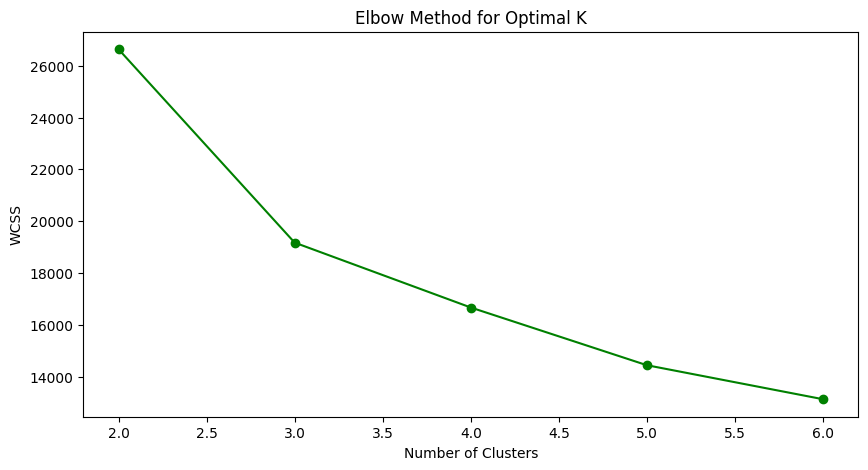

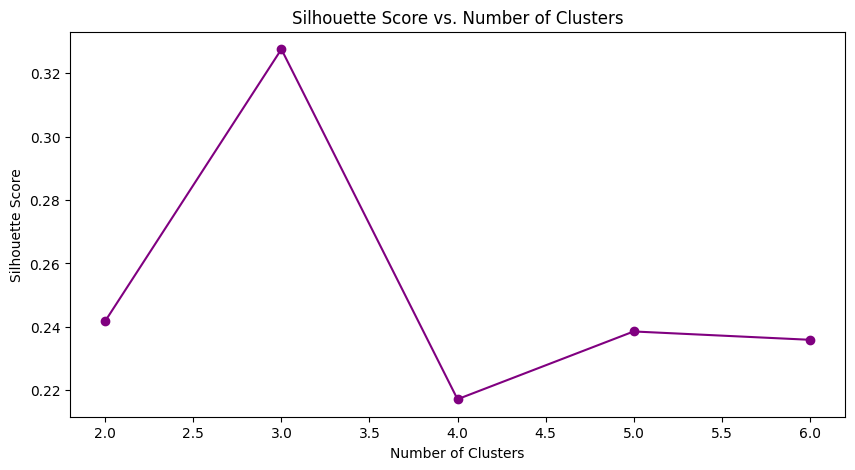

Best K: 3
KMeans Silhouette Score: 0.32763025143525076
KMeans Davies-Bouldin Score: 1.058507548795258
KMeans Calinski-Harabasz Score: 1913.1910121964875


In [ ]:
# KMeans Clustering
wcss = []
silhouette_scores = []
k_range = range(2, 7)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=5, max_iter=100, random_state=42)
    labels = kmeans.fit_predict(distance_matrix)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(distance_matrix, labels, metric='precomputed'))

# Plotting WCSS (Elbow Method)
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='green')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

# Plotting Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='purple')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

# Choosing the best K based on the elbow method and silhouette score
best_k = k_range[np.argmax(silhouette_scores)]
print("Best K:", best_k)

# KMeans Clustering with the chosen K
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(distance_matrix)

# Evaluation Metrics for KMeans
print("KMeans Silhouette Score:", silhouette_score(distance_matrix, kmeans_labels, metric='precomputed'))
print("KMeans Davies-Bouldin Score:", davies_bouldin_score(distance_matrix, kmeans_labels))
print("KMeans Calinski-Harabasz Score:", calinski_harabasz_score(distance_matrix, kmeans_labels))

###**2. APPLYING HDBSCAN**

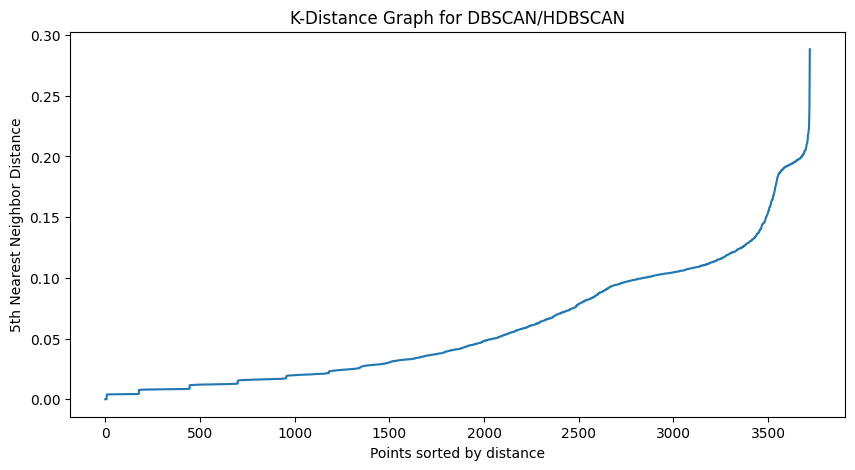

Running HDBSCAN...
HDBSCAN Silhouette Score: 0.5801971627809969
HDBSCAN Davies-Bouldin Score: 1.451840414976876
HDBSCAN Calinski-Harabasz Score: 179.00708515915892


In [ ]:
# K-Distance Graph for HDBSCAN
nn = NearestNeighbors(n_neighbors=7, metric='precomputed')
neighbor_distances, _ = nn.fit(normalized_distance_matrix).kneighbors(normalized_distance_matrix)
k_distances = np.sort(neighbor_distances[:, -1])

plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN/HDBSCAN")
plt.show()

# Replacing DBSCAN With HDBSCAN
print("Running HDBSCAN...")

# Converting distance matrix to float64
normalized_distance_matrix = normalized_distance_matrix.astype(np.float64)

# Continuation with HDBSCAN clustering
hdbscan_clusterer = hdbscan.HDBSCAN(
    min_cluster_size=140,  # Matches min_samples in DBSCAN
    metric='precomputed',
    cluster_selection_method='leaf',  # Default: 'eom' (more stable), 'leaf' (finer clusters)
    alpha=0.9,
    cluster_selection_epsilon=0.05
)

hdbscan_labels = hdbscan_clusterer.fit_predict(normalized_distance_matrix)


# Ensuring diagonal elements are zero before scoring
np.fill_diagonal(normalized_distance_matrix, 0)

# Evaluation Metrics for HDBSCAN (Ignoring Noise)
valid_labels = hdbscan_labels != -1
if np.any(valid_labels):
    print("HDBSCAN Silhouette Score:", silhouette_score(
        normalized_distance_matrix[valid_labels, :][:, valid_labels],
        hdbscan_labels[valid_labels],
        metric='precomputed'
    ))
    print("HDBSCAN Davies-Bouldin Score:", davies_bouldin_score(
        normalized_distance_matrix[valid_labels], hdbscan_labels[valid_labels]
    ))
    print("HDBSCAN Calinski-Harabasz Score:", calinski_harabasz_score(
        normalized_distance_matrix[valid_labels], hdbscan_labels[valid_labels]
    ))
else:
    print("HDBSCAN did not find valid clusters.")


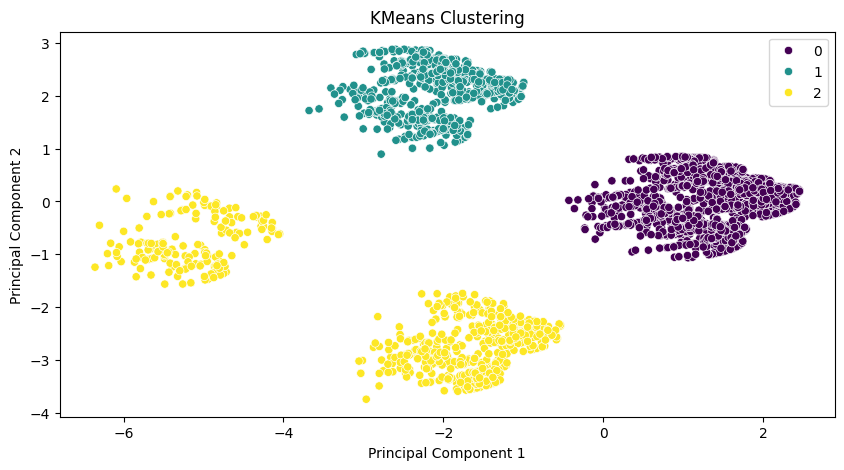

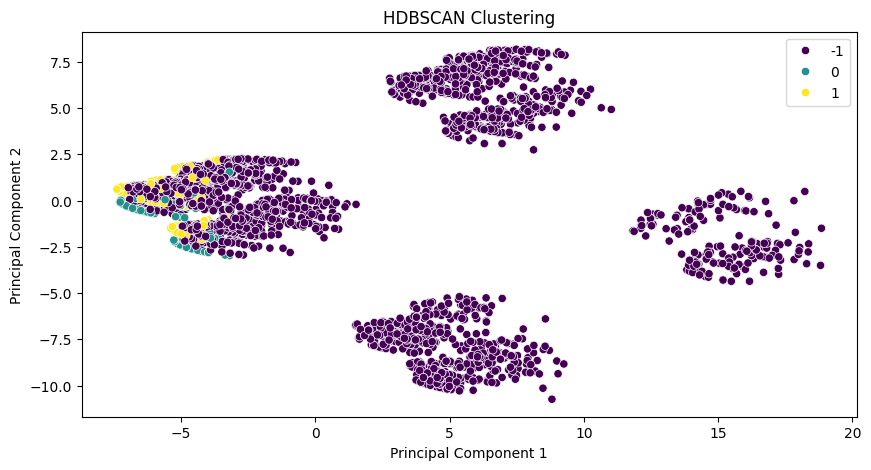

In [ ]:
# Visualizing Clusters for KMeans using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(distance_matrix)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("KMeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Visualization of HDBSCAN
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_distance_matrix)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=hdbscan_labels, palette='viridis')
plt.title("HDBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

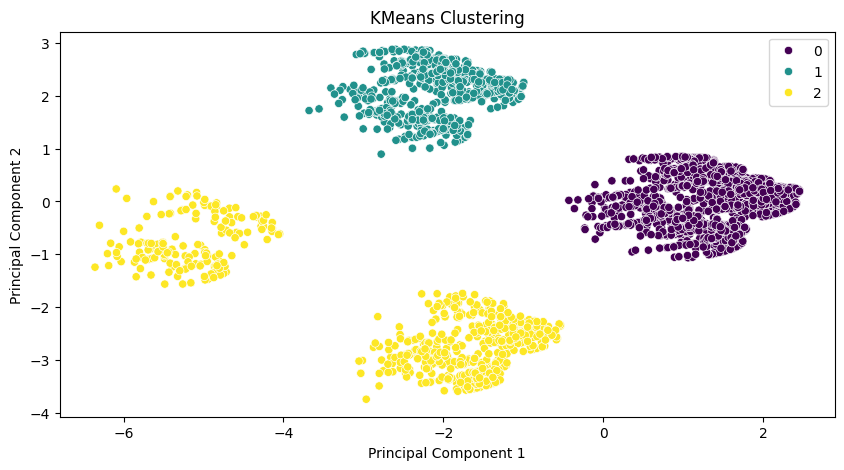

In [ ]:
# Visualizing Clusters for KMeans using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(distance_matrix)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("KMeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

###**3. UMAP**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


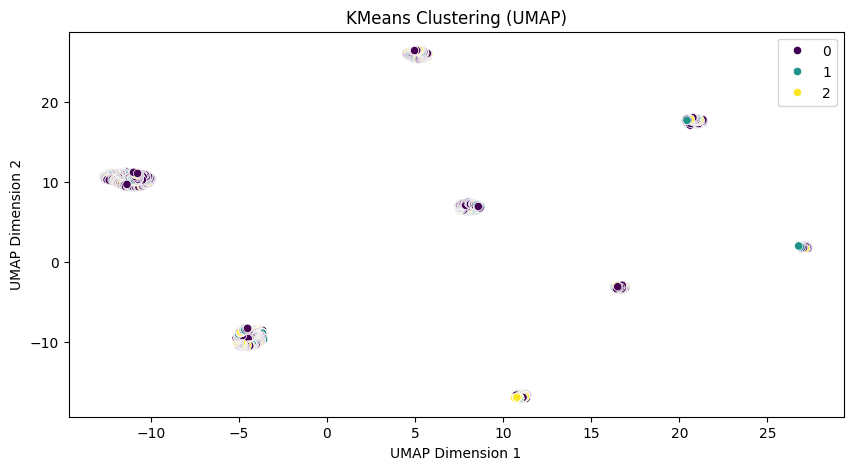

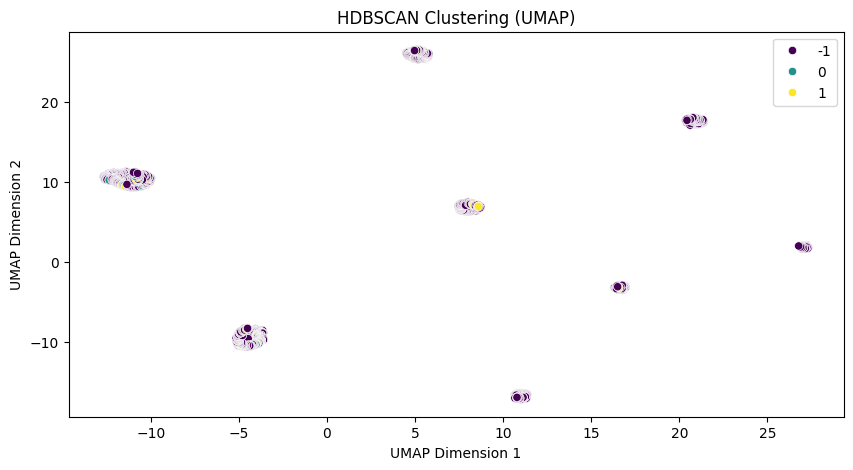

In [ ]:
# UMAP

# Preparing Data for UMAP
# Selecting features for UMAP (can be numerical or binary)
features_for_umap = ['Heroin', 'Cocaine', 'Fentanyl']
X_umap = death_df[features_for_umap]

# Calculating Hamming distance (optional - if using binary features)
hamming_matrix = squareform(pdist(X_umap, metric='hamming'))

# Applying UMAP
reducer = umap.UMAP(n_components=2, metric='euclidean', random_state=42)
umap_data = reducer.fit_transform(X_umap)


# Visualize with KMeans
plt.figure(figsize=(10, 5))
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("KMeans Clustering (UMAP)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend()
plt.show()

# Visualize with HDBSCAN
plt.figure(figsize=(10, 5))
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=hdbscan_labels, palette='viridis')
plt.title("HDBSCAN Clustering (UMAP)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend()
plt.show()

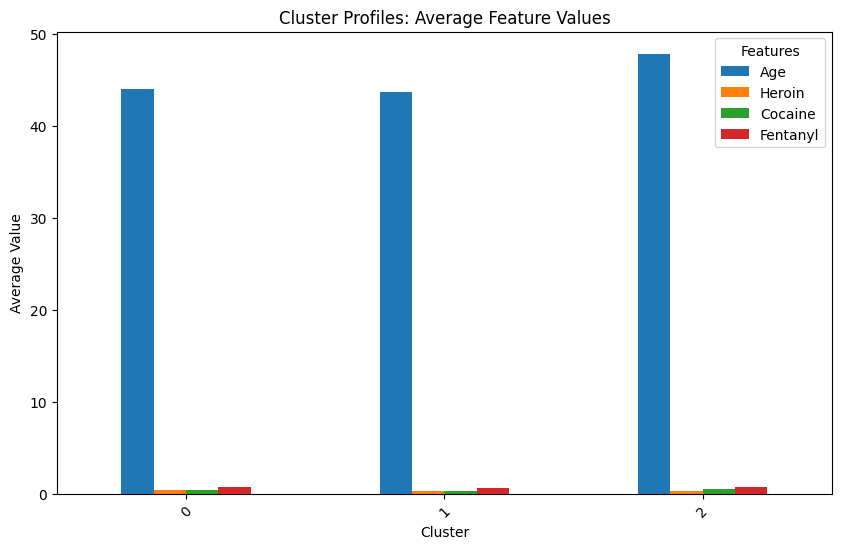

In [ ]:
# Grouping data by cluster and calculate mean values for key features
cluster_profiles = death_df.groupby(kmeans_labels)[['Age', 'Heroin', 'Cocaine', 'Fentanyl']].mean()

# Visualizing cluster profiles using a bar chart
cluster_profiles.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiles: Average Feature Values')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Features')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


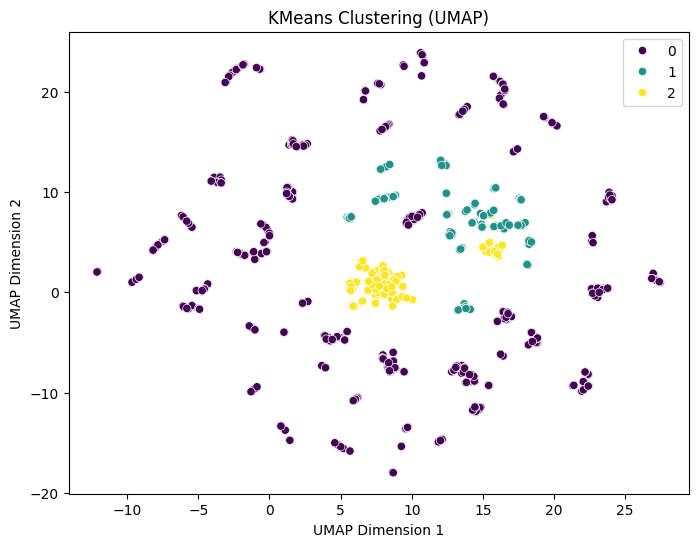

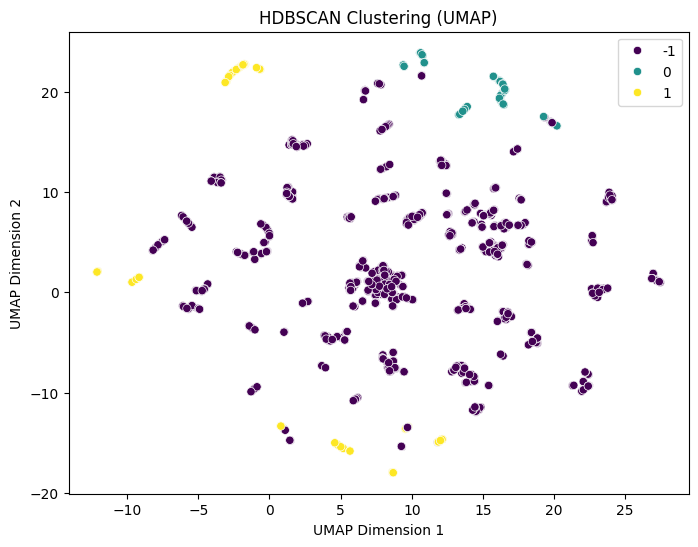

In [ ]:
# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='precomputed', random_state=42)
umap_data = reducer.fit_transform(distance_matrix)

# Visualize KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('KMeans Clustering (UMAP)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

# Visualize HDBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=hdbscan_labels, palette='viridis')
plt.title('HDBSCAN Clustering (UMAP)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

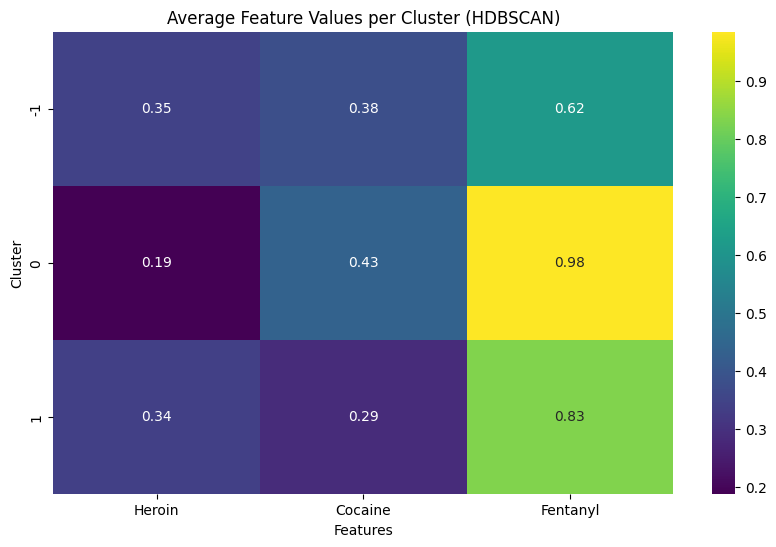

In [ ]:
# Heatmap of features by cluster
# Select features for the heatmap
features_for_heatmap = ['Heroin', 'Cocaine', 'Fentanyl']
# Check if selected features are in the DataFrame
features_for_heatmap = [col for col in features_for_heatmap if col in death_df.columns]

# Group data by cluster and calculate the mean of the selected features
cluster_means = death_df.groupby(hdbscan_labels)[features_for_heatmap].mean()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Feature Values per Cluster (HDBSCAN)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

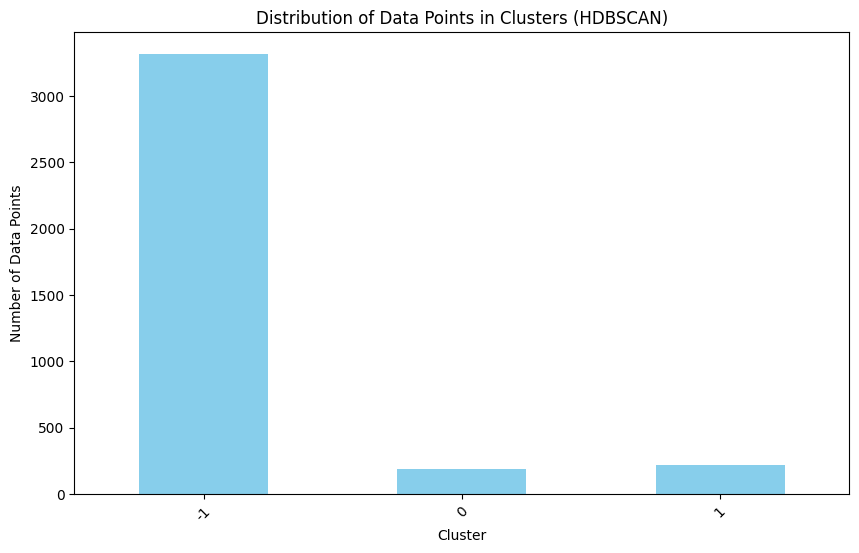

In [ ]:
# Distribution of Data points in cluster using bar

# Group data by cluster
cluster_counts = death_df.groupby(hdbscan_labels).size()

# Create the bar chart
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Data Points in Clusters (HDBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=45)
plt.show()

## **ANOMALY DETECTION**

###**PREPROCESSING FOR ANOMALY DETECTION**

In [ ]:
# Load Dataset
#drug_outlier= pd.read_csv("Accidental_Drug_Related_Deaths.csv")
df = pd.read_csv("Accidental_Drug_Related_Deaths.csv")

In [ ]:
# Create a Deep Copy
drug_outlier = df.copy(deep=True)

# Clean column names (remove extra spaces)
drug_outlier.columns = drug_outlier.columns.str.strip()

# Display Initial Summary
print("Dataset Shape:", drug_outlier.shape)
print("\nDataset Info:")
drug_outlier.info()
print("\nData Description:\n",drug_outlier.describe())

# Checking Missing Values
print("\nMissing Values Before Handling:\n", drug_outlier.isnull().sum())

Dataset Shape: (11981, 48)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           11981 non-null  object 
 1   Date Type                      11981 non-null  object 
 2   Age                            11979 non-null  float64
 3   Sex                            11972 non-null  object 
 4   Race                           11924 non-null  object 
 5   Ethnicity                      2565 non-null   object 
 6   Residence City                 11385 non-null  object 
 7   Residence County               10721 non-null  object 
 8   Residence State                9993 non-null   object 
 9   Injury City                    11803 non-null  object 
 10  Injury County                  8647 non-null   object 
 11  Injury State                   8952 non-null   object 
 12  Inju

In [ ]:
from geopy.distance import geodesic  # Importing geodesic function to calculate distances between coordinates.

# Drop Unnecessary Columns
drop_columns = ['Ethnicity', 'Date Type', 'Other Significant Conditions', 'Location if Other',
                'Description of Injury', 'Cause of Death', 'Manner of Death',
                'Heroin death certificate (DC)', 'Other Opioid', 'Any Opioid', 'Other']
drug_outlier = drug_outlier.drop(columns=[col for col in drop_columns if col in drug_outlier.columns])

# Convert & Transform Date
if 'Date' in drug_outlier.columns:
    drug_outlier['Date'] = pd.to_datetime(drug_outlier['Date'], errors='coerce')
    drug_outlier['YOD'] = drug_outlier['Date'].dt.year  # Extract Year of Death
    drug_outlier = drug_outlier.drop(columns=['Date'])  # Drop original Date column

# Handle Missing Values in Categorical Columns
fill_unknown_columns = [
    'Injury Place', 'Injury City', 'Injury County', 'Injury State',
    'Residence City', 'Residence County', 'Residence State',
    'Death City', 'Death County', 'Death State'
]
for col in fill_unknown_columns:
    if col in drug_outlier.columns:
        drug_outlier[col] = drug_outlier[col].fillna("Unknown")

# Clean & Standardize Race Column
race_mapping = {
    "Black or African American": "Black",
    "Black or African American / American Indian Lenni Lenape": "Black",
    "Asian Indian": "Asian",
    "Asian/Indian": "Asian",
    "Asian, Other": "Asian",
    "Other Asian": "Asian",
    "Other Asian (Specify)": "Asian",
    "Chinese": "Asian",
    "Korean": "Asian",
    "white": "White",
    "Hawaiian": "Other",
    "Native American, Other": "Other",
    "American Indian or Alaska Native": "Other",
    "Other (Specify) Haitian": "Other",
    "Other (Specify) portugese, Cape Verdean": "Other",
    "Other (Specify) Puerto Rican": "Other",
    "Other (Specify)": "Other"
}

if 'Race' in drug_outlier.columns:
    drug_outlier['Race'] = drug_outlier['Race'].str.strip().replace(race_mapping)
    drug_outlier['Race'] = drug_outlier['Race'].fillna("Unknown")

# Impute & Encode 'Sex' Column
if 'Sex' in drug_outlier.columns:
    mode_value = drug_outlier['Sex'].mode()[0]
    drug_outlier['Sex'] = drug_outlier['Sex'].fillna(mode_value)
    drug_outlier['Sex'] = drug_outlier['Sex'].replace({'X': mode_value})
    drug_outlier['Sex'] = drug_outlier['Sex'].map({'Male': 1, 'Female': 0}).fillna(-1).astype(int)

# Clean, Standardize & Rename 'Location' Column
location_mapping = {
    "Decedent’s Home": "Decedent's Home",
    "Hospital - Inpatient": "Hospital",
    "Hospital - ER/Outpatient": "Hospital",
    "Hospital - Dead On Arrival": "Hospital",
    "Hiospital": "Hospital",
    "Hospice": "Hospital",
    "Hospice Facility": "Hospital",
    "Other (Specify)": "Other"
}

if 'Location' in drug_outlier.columns:
    drug_outlier['Location'] = drug_outlier['Location'].replace(location_mapping)
    drug_outlier['Location'] = drug_outlier['Location'].fillna("Unknown")
    drug_outlier = drug_outlier.rename(columns={"Location": "Death Place"})


# Convert Drug Presence Columns to Binary
drug_columns = [
    'Heroin', "Cocaine", "Fentanyl", "Fentanyl Analogue", "Oxycodone", "Oxymorphone",
    "Ethanol", "Hydrocodone", "Benzodiazepine", "Methadone", "Meth/Amphetamine",
    "Amphet", "Tramad", "Hydrocodone", "Hydromorphone", "Morphine (Not Heroin)",
    "Xylazine", "Gabapentin", "Opiate NOS", "Heroin/Morph/Codeine"
]
for col in drug_columns:
    if col in drug_outlier.columns:
        drug_outlier[col] = drug_outlier[col].apply(lambda x: 1 if x == 'Y' else 0)

# Standardize Drug Count
drug_outlier['Drug Count'] = drug_outlier[drug_columns].sum(axis=1)
scaler = StandardScaler()
drug_outlier['Drug Count Standardized'] = scaler.fit_transform(drug_outlier[['Drug Count']])
# Drop rows where 'Drug Count' is 0
drug_outlier = drug_outlier[drug_outlier['Drug Count'] != 0]

# Extract Latitude & Longitude
geo_cols = ['ResidenceCityGeo', 'InjuryCityGeo', 'DeathCityGeo']

def extract_coordinates(geo_value):
    """Extracts latitude and longitude from geolocation text."""
    if pd.isna(geo_value) or geo_value == "Unknown":
        return np.nan
    try:
        return geo_value.split('\n')[-1].strip("()")
    except:
        return np.nan

for col in geo_cols:
    if col in drug_outlier.columns:
        drug_outlier[col] = drug_outlier[col].apply(extract_coordinates)

# Separate Latitude & Longitude
for col in geo_cols:
    if col in drug_outlier.columns:
        lat_col = col.replace("Geo", "LAT")
        lon_col = col.replace("Geo", "LON")
        drug_outlier[[lat_col, lon_col]] = drug_outlier[col].str.split(", ", expand=True).astype(float)

drug_outlier = drug_outlier.drop(columns=geo_cols) # Drop original geo columns

# Drop Rows with Missing Values
drop_na_columns = ['Age', 'ResidenceCityLAT', 'ResidenceCityLON', 'InjuryCityLAT', 'InjuryCityLON', 'DeathCityLAT', 'DeathCityLON']
drug_outlier = drug_outlier.dropna(subset=drop_na_columns)

# Compute Geographic Distance Features
def compute_distance(row):
    """Computes the geodesic distance between two locations."""
    if pd.isna(row['ResidenceCityLAT']) or pd.isna(row['ResidenceCityLON']) or \
       pd.isna(row['DeathCityLAT']) or pd.isna(row['DeathCityLON']):
        return np.nan
    return geodesic((row['ResidenceCityLAT'], row['ResidenceCityLON']),
                    (row['DeathCityLAT'], row['DeathCityLON'])).km

# Compute Residence-to-death distance
drug_outlier['Residence-Death Distance (km)'] = drug_outlier.apply(compute_distance, axis=1)

# Compute injury-to-death distance
drug_outlier['Injury-Death Distance (km)'] = drug_outlier.apply(compute_distance, axis=1)

# Drop Remaining Missing Values
drug_outlier = drug_outlier.dropna()

# Final Data Overview
print("Final Dataset Shape:", drug_outlier.shape)
print("\nMissing Values After Processing:\n", drug_outlier.isnull().sum())


Final Dataset Shape: (11427, 44)

Missing Values After Processing:
 Age                              0
Sex                              0
Race                             0
Residence City                   0
Residence County                 0
Residence State                  0
Injury City                      0
Injury County                    0
Injury State                     0
Injury Place                     0
Death City                       0
Death County                     0
Death State                      0
Death Place                      0
Heroin                           0
Cocaine                          0
Fentanyl                         0
Fentanyl Analogue                0
Oxycodone                        0
Oxymorphone                      0
Ethanol                          0
Hydrocodone                      0
Benzodiazepine                   0
Methadone                        0
Meth/Amphetamine                 0
Amphet                           0
Tramad                

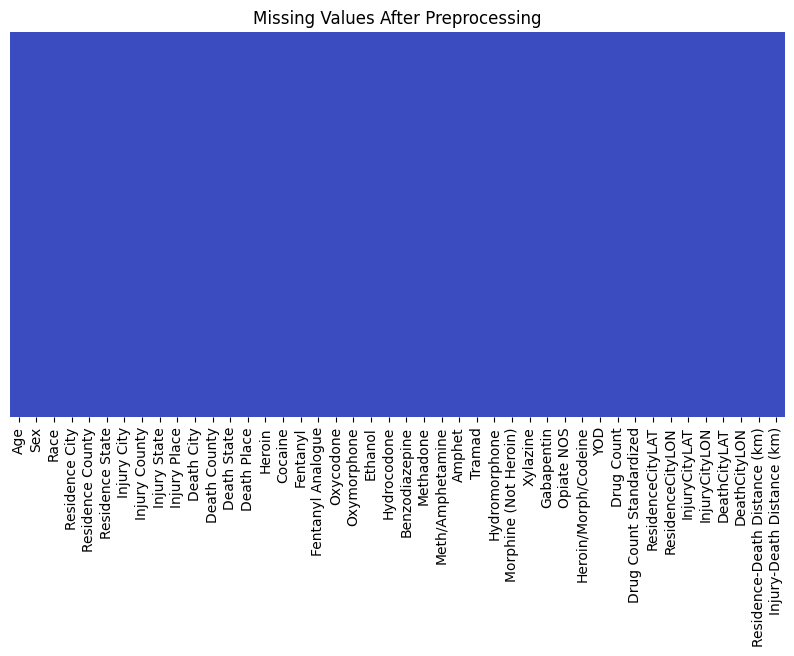

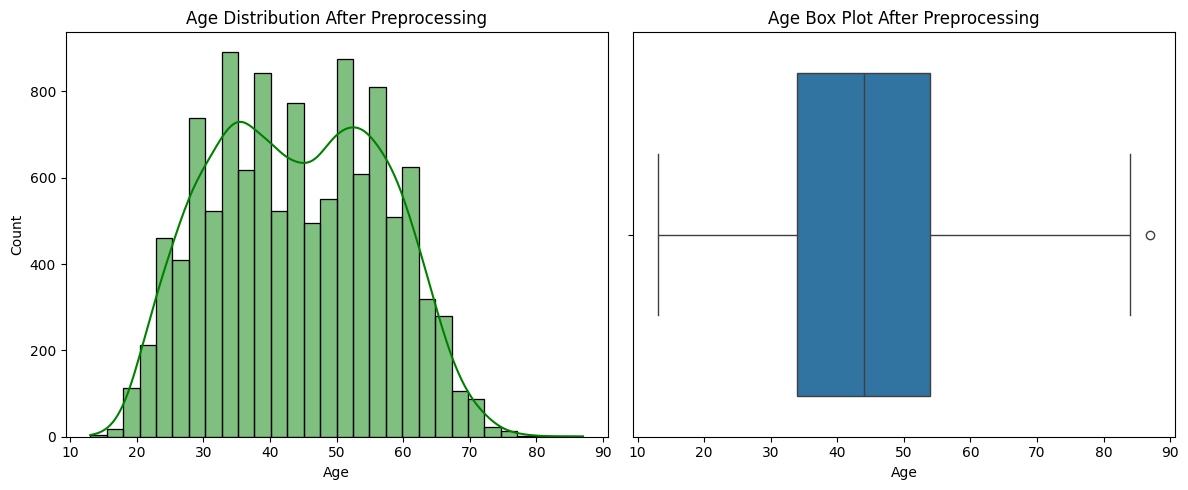

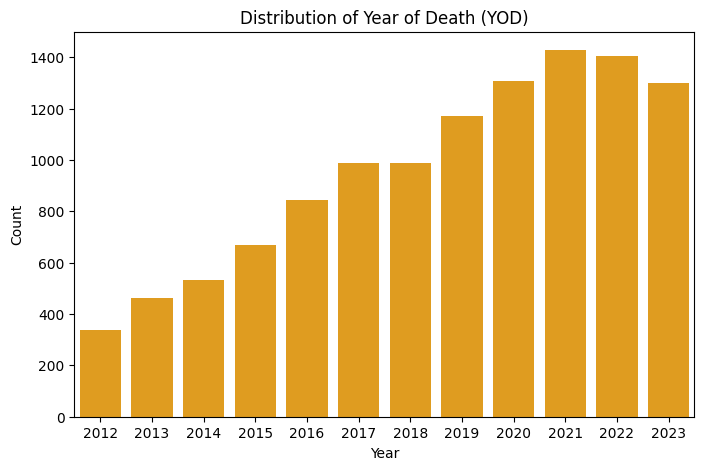

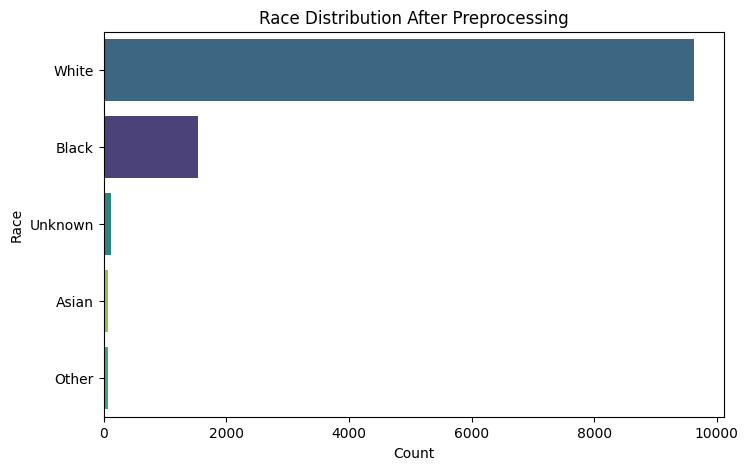

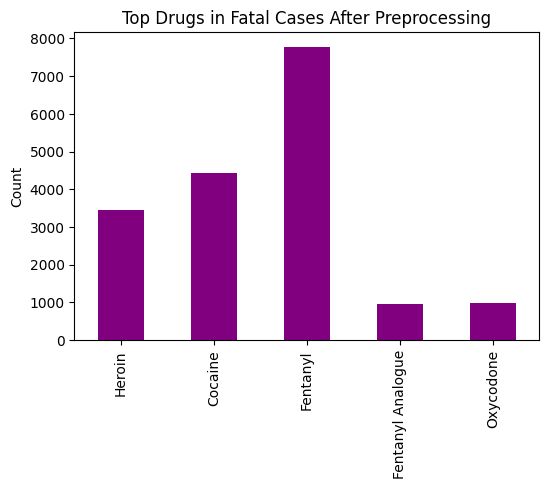

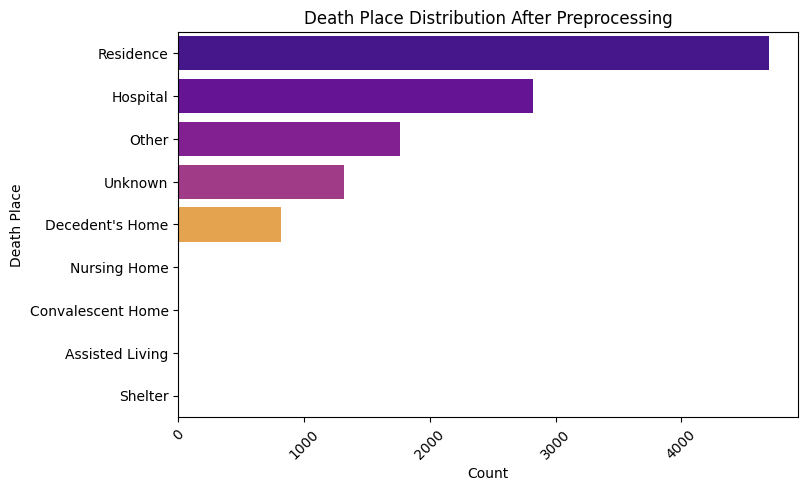

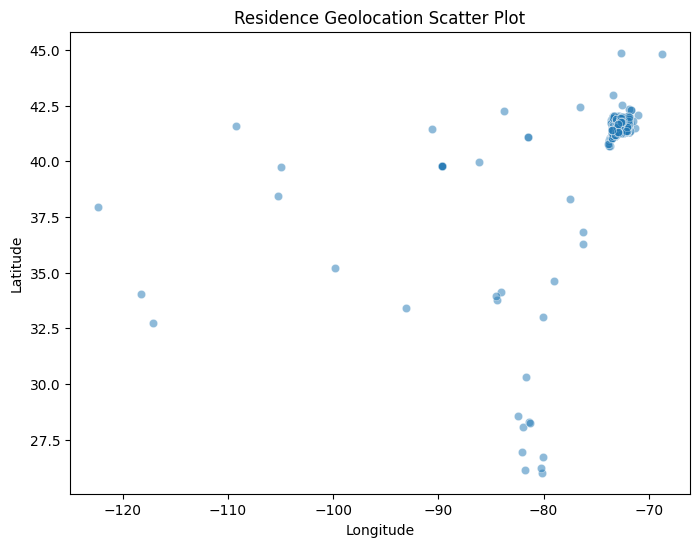

In [ ]:
# Heatmap of Missing Values After Preprocessing
# To confirm that missing values have been properly handled
plt.figure(figsize=(10, 5))
sns.heatmap(drug_outlier.isnull(), cmap='coolwarm', cbar=False, yticklabels=False)
plt.title("Missing Values After Preprocessing")
plt.show()

# Age Distribution: Histogram and Box Plot After Preprocessing
# To observe if the distribution remains intact and how standardization affects values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(drug_outlier['Age'], bins=30, kde=True, color='green')
plt.title("Age Distribution After Preprocessing")

plt.subplot(1, 2, 2)
sns.boxplot(x=drug_outlier['Age'])
plt.title("Age Box Plot After Preprocessing")

plt.tight_layout()
plt.show()

# Histogram of Year of Death (YOD)
# To analyze time trends in drug-related deaths
if 'YOD' in drug_outlier.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='YOD', data=drug_outlier, color='orange')
    plt.title("Distribution of Year of Death (YOD)")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()

# Race Distribution After Cleaning
# To ensure transformations (e.g., merging categories) are correctly applied
plt.figure(figsize=(8, 5))
sns.countplot(y=drug_outlier['Race'], order=drug_outlier['Race'].value_counts().index, hue=drug_outlier['Race'], palette="viridis", legend=False)
plt.title("Race Distribution After Preprocessing")
plt.xlabel("Count")
plt.ylabel("Race")
plt.show()

# Drug Presence Distribution After Encoding
# To confirm binary transformation and compare with previous drug presence distribution
plt.figure(figsize=(6, 4))
top_drugs = ["Heroin", "Cocaine", "Fentanyl", "Fentanyl Analogue", "Oxycodone"]
drug_outlier[top_drugs].sum().plot(kind='bar', color='purple')
plt.title("Top Drugs in Fatal Cases After Preprocessing")
plt.ylabel("Count")
plt.show()

# Death Locations After Standardization
# To verify that location renaming and missing value handling worked correctly
plt.figure(figsize=(8, 5))
sns.countplot(y='Death Place', data=drug_outlier, order=drug_outlier['Death Place'].value_counts().index, hue='Death Place', palette="plasma", legend=False)
plt.title("Death Place Distribution After Preprocessing")
plt.xlabel("Count")
plt.ylabel("Death Place")
plt.xticks(rotation=45)
plt.show()

# Manner of Death Distribution
# To analyze the final cleaned categories of 'Manner of Death'
if 'Manner of Death' in drug_outlier.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(y='Manner of Death', data=drug_outlier, order=drug_outlier['Manner of Death'].value_counts().index, hue='Manner of Death', palette="cividis", legend=False)
    plt.title("Distribution of Manner of Death")
    plt.xlabel("Count")
    plt.ylabel("Manner of Death")
    plt.show()

# Residence Geolocation Scatter Plot
# To visualize the geographical distribution of fatal cases
if ('ResidenceCityLAT' in drug_outlier.columns) and ('ResidenceCityLON' in drug_outlier.columns):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='ResidenceCityLON', y='ResidenceCityLAT', data=drug_outlier, alpha=0.5)
    plt.title("Residence Geolocation Scatter Plot")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


In [ ]:
# Save the preprocessed DataFrame to a CSV file
drug_outlier.to_csv('preprocessed_drug_outlier.csv', index=False)

###**OUTLIER DETECTION USING ONE-CLASS SVM**

Detected Outliers: 26 cases
         Age  Sex     Race     Residence City Residence County Residence State   Injury City Injury County Injury State           Injury Place Death City Death County Death State Death Place  Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  Ethanol  Hydrocodone  Benzodiazepine  Methadone  Meth/Amphetamine  Amphet  Tramad  Hydromorphone  Morphine (Not Heroin)  Xylazine  Gabapentin  Opiate NOS  Heroin/Morph/Codeine   YOD  Drug Count  Drug Count Standardized  ResidenceCityLAT  ResidenceCityLON  InjuryCityLAT  InjuryCityLON  DeathCityLAT  DeathCityLON  Residence-Death Distance (km)  Injury-Death Distance (km)
2765   31.0    1    White           THOMPSON          WINDHAM              CT      THOMPSON       WINDHAM           CT                  House     PUTNAM      WINDHAM          CT    Hospital       0        0         1                  0          0            0        1            0               0          0                 0       0    

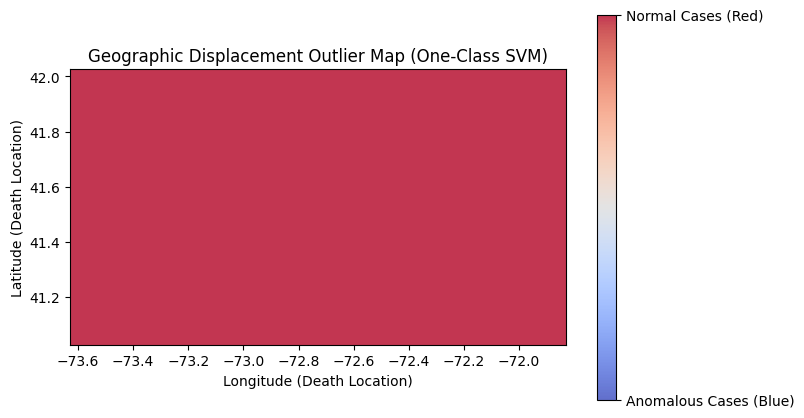

In [ ]:
# Remove duplicates before applying anomaly detection methods
drug_outlier.drop_duplicates(subset=['Residence-Death Distance (km)'], inplace=True)

geo_features = ['ResidenceCityLAT', 'ResidenceCityLON',
                'InjuryCityLAT', 'InjuryCityLON',
                'DeathCityLAT', 'DeathCityLON']

drug_outlier_geo = drug_outlier[geo_features].apply(pd.to_numeric, errors='coerce')

### OUTLIER DETECTION USING ONE-CLASS SVM

# Train One-Class SVM Model for Anomaly Detection
'''
- kernel='rbf': Radial Basis Function kernel (good for non-linear patterns)
- gamma=0.001: Controls the influence of data points (affects decision boundary)
- nu=0.02: Expected proportion of outliers (2%) (detects extreme outliers)
'''
svm_model = OneClassSVM(nu=0.02, kernel="rbf", gamma=0.001)
svm_model.fit(drug_outlier_geo) # Fit the model
svm_outliers = svm_model.predict(drug_outlier_geo)  # Predict Outliers (-1 = Outlier, 1 = Normal)


# Extract Outliers

# Get Indexes of Outliers
outlier_indexes = where(svm_outliers == -1)

# Retrieve Outlier Data Points
outliers = drug_outlier.iloc[outlier_indexes]
print(f"Detected Outliers: {len(outliers)} cases\n", outliers)

# Visualize Geographic Anomalies (Outlier Map)

# Extract Longitude & Latitude
longitudes = drug_outlier_geo["DeathCityLON"]
latitudes = drug_outlier_geo["DeathCityLAT"]

# Define a Fine-Grid Mesh for Higher Resolution
grid_size = 65
lon_min, lon_max = longitudes.min(), longitudes.max()
lat_min, lat_max = latitudes.min(), latitudes.max()

lon_grid, lat_grid = np.meshgrid(
    np.linspace(lon_min, lon_max, grid_size),
    np.linspace(lat_min, lat_max, grid_size)
)

# Initialize Heatmap (1 = Normal, -1 = Outlier)
outlier_map = np.ones(lon_grid.shape)

# Assign Outliers Based on Predictions
for i in range(len(latitudes)):
    lon_idx = np.abs(lon_grid[0] - longitudes.iloc[i]).argmin()
    lat_idx = np.abs(lat_grid[:, 0] - latitudes.iloc[i]).argmin()
    outlier_map[lat_idx, lon_idx] = -1 if svm_outliers[i] == -1 else 1  # Assign Outliers (-1)

# Plot the Outlier Map
plt.figure(figsize=(8, 5))
cmap = plt.cm.coolwarm  # Blue (-1) for outliers, Red (1) for normal points
norm = plt.Normalize(vmin=-1, vmax=1)

img = plt.imshow(outlier_map, cmap=cmap, norm=norm, origin="lower",
                 extent=[lon_min, lon_max, lat_min, lat_max], alpha=0.8)
cbar = plt.colorbar(img)
cbar.set_ticks([-1, 1])
cbar.set_ticklabels(["Anomalous Cases (Blue)", "Normal Cases (Red)"])

plt.xlabel("Longitude (Death Location)")
plt.ylabel("Latitude (Death Location)")
plt.title("Geographic Displacement Outlier Map (One-Class SVM)")

plt.show()


###**OUTLIER DETECTION USING ISOLATION FOREST**

Detected Outliers: 26 cases
         Age  Sex     Race   Residence City Residence County Residence State   Injury City Injury County Injury State           Injury Place    Death City Death County Death State Death Place  Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  Ethanol  Hydrocodone  Benzodiazepine  Methadone  Meth/Amphetamine  Amphet  Tramad  Hydromorphone  Morphine (Not Heroin)  Xylazine  Gabapentin  Opiate NOS  Heroin/Morph/Codeine   YOD  Drug Count  Drug Count Standardized  ResidenceCityLAT  ResidenceCityLON  InjuryCityLAT  InjuryCityLON  DeathCityLAT  DeathCityLON  Residence-Death Distance (km)  Injury-Death Distance (km)
208    29.0    1    White     PORT CHESTER      WESTCHESTER              NY     GREENWICH     FAIRFIELD      Unknown         Hotel or Motel     GREENWICH    FAIRFIELD          CT       Other       1        0         1                  1          0            0        0            0               0          0                 0       0  

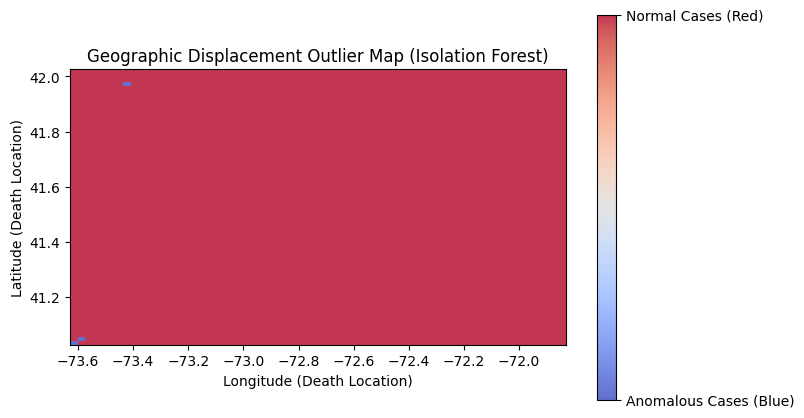

In [ ]:
### OUTLIER DETECTION USING ISOLATION FOREST

# Train Isolation Forest Model for Anomaly Detection
'''
- n_estimators=50: Number of trees in the forest.
- contamination=0.02: Expected proportion of outliers (2%).
- random_state=42: Ensures reproducibility.
'''
iso_model = IsolationForest(n_estimators=50, contamination=0.02, random_state=42)
iso_model.fit(drug_outlier_geo) # Fit the model
iso_outliers = iso_model.predict(drug_outlier_geo)  # Predict Outliers (-1 = Outlier, 1 = Normal)

# Extract Outliers

# Get Indexes of Outliers
outlier_indexes = where(iso_outliers == -1)

# Retrieve Outlier Data Points
outliers = drug_outlier.iloc[outlier_indexes]
print(f"Detected Outliers: {len(outliers)} cases\n", outliers)

# Visualize Geographic Anomalies (Outlier Map)

# Extract Longitude & Latitude
longitudes = drug_outlier_geo["DeathCityLON"]
latitudes = drug_outlier_geo["DeathCityLAT"]

# Define a Fine-Grid Mesh for Higher Resolution
grid_size = 65
lon_min, lon_max = longitudes.min(), longitudes.max()
lat_min, lat_max = latitudes.min(), latitudes.max()

lon_grid, lat_grid = np.meshgrid(
    np.linspace(lon_min, lon_max, grid_size),
    np.linspace(lat_min, lat_max, grid_size)
)

# Initialize Heatmap (1 = Normal, -1 = Outlier)
outlier_map = np.ones(lon_grid.shape)

# Assign Outliers Based on Predictions
for i in range(len(latitudes)):
    lon_idx = np.abs(lon_grid[0] - longitudes.iloc[i]).argmin()
    lat_idx = np.abs(lat_grid[:, 0] - latitudes.iloc[i]).argmin()
    outlier_map[lat_idx, lon_idx] = -1 if iso_outliers[i] == -1 else 1  # Assign Outliers (-1)

# Plot the Outlier Map
plt.figure(figsize=(8, 5))
cmap = plt.cm.coolwarm  # Blue (-1) for outliers, Red (1) for normal points
norm = plt.Normalize(vmin=-1, vmax=1)

img = plt.imshow(outlier_map, cmap=cmap, norm=norm, origin="lower",
                 extent=[lon_min, lon_max, lat_min, lat_max], alpha=0.8)
cbar = plt.colorbar(img)
cbar.set_ticks([-1, 1])
cbar.set_ticklabels(["Anomalous Cases (Blue)", "Normal Cases (Red)"])

plt.xlabel("Longitude (Death Location)")
plt.ylabel("Latitude (Death Location)")
plt.title("Geographic Displacement Outlier Map (Isolation Forest)")

plt.show()


###**OUTLIER DETECTION USING LOCAL OUTLIER FACTOR (LOF)**

Detected Outliers: 39 cases
         Age  Sex     Race     Residence City Residence County Residence State   Injury City Injury County Injury State           Injury Place    Death City Death County Death State Death Place  Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  Ethanol  Hydrocodone  Benzodiazepine  Methadone  Meth/Amphetamine  Amphet  Tramad  Hydromorphone  Morphine (Not Heroin)  Xylazine  Gabapentin  Opiate NOS  Heroin/Morph/Codeine   YOD  Drug Count  Drug Count Standardized  ResidenceCityLAT  ResidenceCityLON  InjuryCityLAT  InjuryCityLON  DeathCityLAT  DeathCityLON  Residence-Death Distance (km)  Injury-Death Distance (km)
586    26.0    1    White           WESTERLY       WASHINGTON              RI      WESTERLY    WASHINGTON      Unknown              Residence     NEW HAVEN    NEW HAVEN          CT    Hospital       0        0         1                  0          0            0        0            0               0          0                 0      

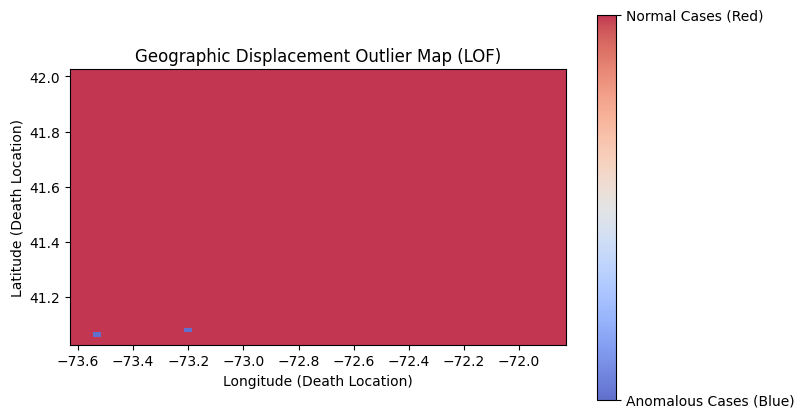

In [ ]:
### OUTLIER DETECTION USING LOCAL OUTLIER FACTOR (LOF)

# Train LOF Model for Anomaly Detection**

lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.03, novelty=False)
lof_outliers = lof_model.fit_predict(drug_outlier_geo)  # Predict Outliers (-1 = Outlier, 1 = Normal)

# Step 2: Extract Outliers**
# Get Indexes of Outliers
outlier_indexes = where(lof_outliers == -1)

# Retrieve Outlier Data Points
outliers = drug_outlier.iloc[outlier_indexes]
print(f"Detected Outliers: {len(outliers)} cases\n", outliers)

# Step 3: Visualize Geographic Anomalies (Minesweeper-Style Outlier Map)**
# Extract Longitude & Latitude
longitudes = drug_outlier_geo["DeathCityLON"]
latitudes = drug_outlier_geo["DeathCityLAT"]

# Define a Fine-Grid Mesh for Higher Resolution
grid_size = 65
lon_min, lon_max = longitudes.min(), longitudes.max()
lat_min, lat_max = latitudes.min(), latitudes.max()

lon_grid, lat_grid = np.meshgrid(
    np.linspace(lon_min, lon_max, grid_size),
    np.linspace(lat_min, lat_max, grid_size)
)

# Initialize Heatmap (1 = Normal, -1 = Outlier)
outlier_map = np.ones(lon_grid.shape)

# Assign Outliers Based on Predictions
for i in range(len(latitudes)):
    lon_idx = np.abs(lon_grid[0] - longitudes.iloc[i]).argmin()
    lat_idx = np.abs(lat_grid[:, 0] - latitudes.iloc[i]).argmin()
    outlier_map[lat_idx, lon_idx] = -1 if lof_outliers[i] == -1 else 1  # Assign Outliers (-1)

# Step 4: Plot the Outlier Map**
plt.figure(figsize=(8, 5))
cmap = plt.cm.coolwarm  # Blue (-1) for outliers, Red (1) for normal points
norm = plt.Normalize(vmin=-1, vmax=1)

img = plt.imshow(outlier_map, cmap=cmap, norm=norm, origin="lower",
                 extent=[lon_min, lon_max, lat_min, lat_max], alpha=0.8)
cbar = plt.colorbar(img)
cbar.set_ticks([-1, 1])
cbar.set_ticklabels(["Anomalous Cases (Blue)", "Normal Cases (Red)"])

plt.xlabel("Longitude (Death Location)")
plt.ylabel("Latitude (Death Location)")
plt.title("Geographic Displacement Outlier Map (LOF)")

plt.show()


###**MODEL COMPARISON**

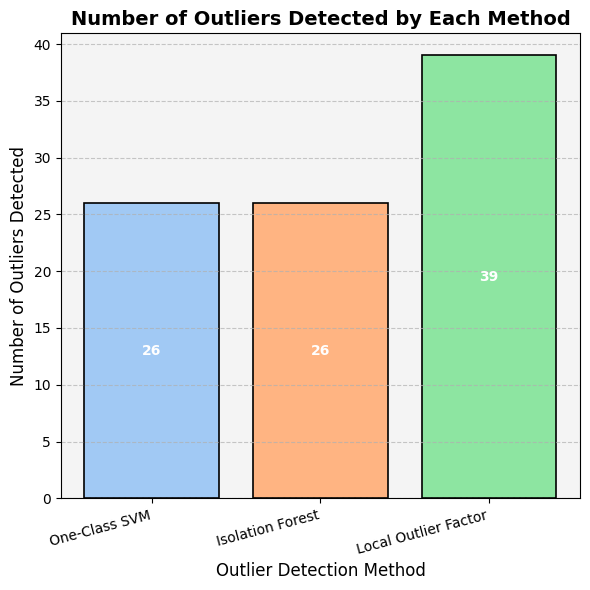

In [ ]:
# Comparative Visualization (Bar Plot)

outlier_counts = [26, 26, 39]
methods = ['One-Class SVM', 'Isolation Forest', 'Local Outlier Factor' ]

plt.figure(figsize=(6, 6))
colors = sns.color_palette("pastel")[:3]  # Get the first 3 colors from the 'pastel' palette
plt.bar(methods, outlier_counts, color=colors, edgecolor='black', linewidth=1.2)  # Add edgecolor and linewidth

plt.xlabel("Outlier Detection Method", fontsize=12)
plt.ylabel("Number of Outliers Detected", fontsize=12)
plt.title("Number of Outliers Detected by Each Method", fontsize=14, fontweight='bold')  # Adjust font size and font weight

# Text positioning and styling (Adjust vertical position, font size, weight, and color)
for i, count in enumerate(outlier_counts):
    plt.text(i, count / 2, str(count), ha='center', va='center', fontsize=10, fontweight='bold', color='white')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid
plt.xticks(rotation=15, ha='right')  # Rotate labels by 15 degrees and align to the right
plt.gca().set_facecolor('#f4f4f4') # Set a light gray background color
plt.tight_layout()  # Adjust layout for better spacing
plt.show()



In [ ]:
### IDENTIFY UNIQUE OUTLIERS FOR EACH METHOD

# Get unique outlier indexes from each method
svm_unique_outliers = set(where(svm_outliers == -1)[0])
iso_unique_outliers = set(where(iso_outliers == -1)[0])
lof_unique_outliers = set(where(lof_outliers == -1)[0])

# Find unique outliers for each method
svm_only = svm_unique_outliers - lof_unique_outliers - iso_unique_outliers
iso_only = iso_unique_outliers - svm_unique_outliers - lof_unique_outliers
lof_only = lof_unique_outliers - svm_unique_outliers - iso_unique_outliers

# Print the number of unique outliers detected by each method
print(f"Number of unique outliers detected by One-Class SVM only: {len(svm_only)}")
print(f"Number of unique outliers detected by Isolation Forest only: {len(iso_only)}")
print(f"Number of unique outliers detected by LOF only: {len(lof_only)}")

# Access the unique outlier data points using the indexes
svm_only_outliers = drug_outlier.iloc[list(svm_only)]
iso_only_outliers = drug_outlier.iloc[list(iso_only)]
lof_only_outliers = drug_outlier.iloc[list(lof_only)]

# Print the first 5 unique outliers found by each method
print("\nFirst 5 unique outliers found by One-Class SVM:\n", svm_only_outliers.head())
print("\nFirst 5 unique outliers found by Isolation Forest:\n", iso_only_outliers.head())
print("\nFirst 5 unique outliers found by LOF:\n", lof_only_outliers.head())

Number of unique outliers detected by One-Class SVM only: 8
Number of unique outliers detected by Isolation Forest only: 14
Number of unique outliers detected by LOF only: 27

First 5 unique outliers found by One-Class SVM:
         Age  Sex   Race Residence City Residence County Residence State   Injury City Injury County Injury State           Injury Place Death City Death County Death State Death Place  Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  Ethanol  Hydrocodone  Benzodiazepine  Methadone  Meth/Amphetamine  Amphet  Tramad  Hydromorphone  Morphine (Not Heroin)  Xylazine  Gabapentin  Opiate NOS  Heroin/Morph/Codeine   YOD  Drug Count  Drug Count Standardized  ResidenceCityLAT  ResidenceCityLON  InjuryCityLAT  InjuryCityLON  DeathCityLAT  DeathCityLON  Residence-Death Distance (km)  Injury-Death Distance (km)
11605  35.0    1  White     SHREWSBURY        WORCESTER              MA     WOODSTOCK       WINDHAM           CT                  Other    Unknown  

In [ ]:
### IDENTIFY CONSISTENT OUTLIERS ACROSS ALL MODELS

# Identify Data Points Flagged as Outliers by All Three Models
consistent_outlier_mask = (svm_outliers == -1) & (lof_outliers == -1) & (iso_outliers == -1) #.astype(int)

# Extract Consistently Flagged Outliers
consistent_outliers = drug_outlier[consistent_outlier_mask]

# Display Results
print(f"Total Consistent Outliers Detected by All Models: {len(consistent_outliers)} cases\n")
print(consistent_outliers)



Total Consistent Outliers Detected by All Models: 2 cases

        Age  Sex     Race Residence City Residence County Residence State Injury City Injury County Injury State           Injury Place Death City Death County Death State Death Place  Heroin  Cocaine  Fentanyl  Fentanyl Analogue  Oxycodone  Oxymorphone  Ethanol  Hydrocodone  Benzodiazepine  Methadone  Meth/Amphetamine  Amphet  Tramad  Hydromorphone  Morphine (Not Heroin)  Xylazine  Gabapentin  Opiate NOS  Heroin/Morph/Codeine   YOD  Drug Count  Drug Count Standardized  ResidenceCityLAT  ResidenceCityLON  InjuryCityLAT  InjuryCityLON  DeathCityLAT  DeathCityLON  Residence-Death Distance (km)  Injury-Death Distance (km)
10270  30.0    1  Unknown      SAN DIEGO        SAN DIEGO              CA    HARTFORD      HARTFORD           CT                   Home    Unknown      Unknown     Unknown       Other       0        0         1                  0          0            0        0            0               0          0            

###**PERFORMANCE EVALUATION**

In [ ]:
### STATISTICAL ANOMALY DETECTION

# Column of interest
col = 'Residence-Death Distance (km)'

# Standard Deviation Method (3-Sigma Rule)
mean_val = drug_outlier[col].mean()
std_dev = drug_outlier[col].std()

# Thresholds
upper_bound_3sigma = mean_val + (3 * std_dev)
lower_bound_3sigma = mean_val - (3 * std_dev)

# Detect anomalies based on 3-sigma rule
drug_outlier['3Sigma_Anomaly'] = (drug_outlier[col] > upper_bound_3sigma) | (drug_outlier[col] < lower_bound_3sigma)

# Interquartile Range (IQR) Method
Q1 = drug_outlier[col].quantile(0.25)
Q3 = drug_outlier[col].quantile(0.75)
IQR = Q3 - Q1

# IQR thresholds
upper_bound_iqr = Q3 + (1.5 * IQR)
lower_bound_iqr = Q1 - (1.5 * IQR)

# Detect anomalies based on IQR rule
drug_outlier['IQR_Anomaly'] = (drug_outlier[col] > upper_bound_iqr) | (drug_outlier[col] < lower_bound_iqr)

# Combine Anomalies Detected by Both Methods
drug_outlier['Statistical_Anomaly'] = drug_outlier['3Sigma_Anomaly'] & drug_outlier['IQR_Anomaly']

# Filter only detected anomalies
statistical_anomalies = drug_outlier[drug_outlier['Statistical_Anomaly']]

# Display results
print(f"Total Anomalies Detected: {statistical_anomalies.shape[0]}")
print(statistical_anomalies[[col, '3Sigma_Anomaly', 'IQR_Anomaly', 'Statistical_Anomaly']])


Total Anomalies Detected: 26
       Residence-Death Distance (km)  3Sigma_Anomaly  IQR_Anomaly  Statistical_Anomaly
9290                     1833.625894            True         True                 True
9480                     1718.797485            True         True                 True
9679                     2006.423577            True         True                 True
9704                     1688.791353            True         True                 True
9710                     4211.585335            True         True                 True
9803                     1142.781581            True         True                 True
9807                     1150.092726            True         True                 True
9823                     1670.360887            True         True                 True
10064                    1440.141574            True         True                 True
10138                    1856.160077            True         True                 True
10270         

In [ ]:
# Statistical Anomalies (Ground Truth for Evaluation)
mean_val = drug_outlier[col].mean()
std_dev = drug_outlier[col].std()
upper_bound_3sigma = mean_val + (3 * std_dev)
lower_bound_3sigma = mean_val - (3 * std_dev)
drug_outlier['3Sigma_Anomaly'] = (drug_outlier[col] > upper_bound_3sigma) | (drug_outlier[col] < lower_bound_3sigma)

Q1 = drug_outlier[col].quantile(0.25)
Q3 = drug_outlier[col].quantile(0.75)
IQR = Q3 - Q1
upper_bound_iqr = Q3 + (1.5 * IQR)
lower_bound_iqr = Q1 - (1.5 * IQR)
drug_outlier['IQR_Anomaly'] = (drug_outlier[col] > upper_bound_iqr) | (drug_outlier[col] < lower_bound_iqr)

drug_outlier['Statistical_Anomaly'] = (drug_outlier['3Sigma_Anomaly'] & drug_outlier['IQR_Anomaly']).astype(int)


# 2. Compare with Statistical Anomalies
methods = [svm_model, iso_model, lof_model]
method_names = ['One-Class SVM', 'Isolation Forest', 'Local Outlier Factor (LOF)']

for i, method in enumerate(methods):
    # Get predictions for the current method
    if isinstance(method, LocalOutlierFactor):
        predictions = method.fit_predict(drug_outlier_geo)
    else:
        predictions = method.predict(drug_outlier_geo)

    # Convert predictions to 1 for inliers and -1 for outliers
    predictions = np.where(predictions == 1, 1, -1)

    # Add predictions as a column to the DataFrame for easier comparison
    drug_outlier[method_names[i]] = predictions

    # Performance evaluation
    true_positives = np.sum((drug_outlier[method_names[i]] == -1) & (drug_outlier['Statistical_Anomaly'] == 1))
    false_positives = np.sum((drug_outlier[method_names[i]] == -1) & (drug_outlier['Statistical_Anomaly'] == 0))
    false_negatives = np.sum((drug_outlier[method_names[i]] == 1) & (drug_outlier['Statistical_Anomaly'] == 1))

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    print(f"\n--- {method_names[i]} Evaluation ---")
    print(f"True Positives: {true_positives}")
    print(f"False Positives: {false_positives}")
    print(f"False Negatives: {false_negatives}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")


--- One-Class SVM Evaluation ---
True Positives: 15
False Positives: 11
False Negatives: 11
Precision: 0.577
Recall: 0.577

--- Isolation Forest Evaluation ---
True Positives: 15
False Positives: 11
False Negatives: 11
Precision: 0.577
Recall: 0.577

--- Local Outlier Factor (LOF) Evaluation ---
True Positives: 5
False Positives: 34
False Negatives: 21
Precision: 0.128
Recall: 0.192


--- Evaluation Metrics ---

True Positives (TP): Correctly identified outliers.

False Positives (FP): Incorrectly identified as outliers (normal data points).

False Negatives (FN): Outliers that were missed.

Precision: TP / (TP + FP) - How many of the detected outliers were actually outliers.

Recall: TP / (TP + FN) - How many of the actual outliers were detected.


##**COMPARISON VISUALIZATION**

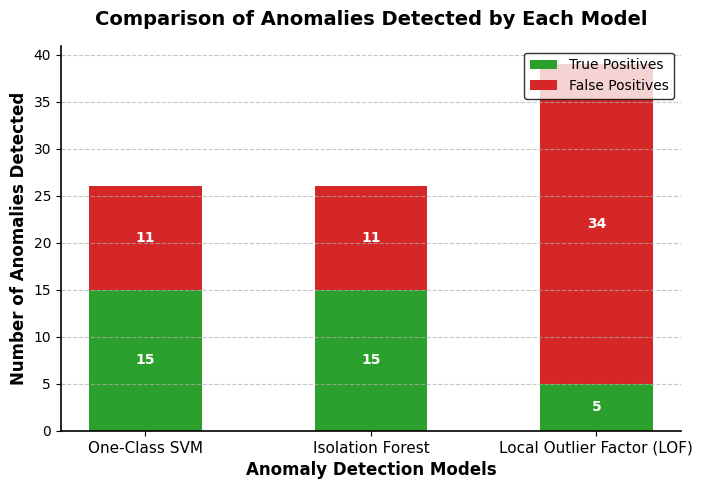

In [ ]:
### Comparison Visualization

# Model names
models = ["One-Class SVM", "Isolation Forest", "Local Outlier Factor (LOF)"]

# True Positives and False Positives
true_positives = [15, 15, 5]
false_positives = [11, 11, 34]

# Bar positions
x = np.arange(len(models))

# Plot settings
fig, ax = plt.subplots(figsize=(8, 5))
bar1 = ax.bar(x, true_positives, width=0.5, label="True Positives", color='#2ca02c')
bar2 = ax.bar(x, false_positives, width=0.5, bottom=true_positives, label="False Positives", color='#d62728')

# Labels and title
ax.set_xlabel("Anomaly Detection Models", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Anomalies Detected", fontsize=12, fontweight='bold')
ax.set_title("Comparison of Anomalies Detected by Each Model", fontsize=14, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')

# Display values inside the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                f"{int(height)}", ha='center', va='center', fontsize=10,
                fontweight='bold', color='white')

# For better readability
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.show()

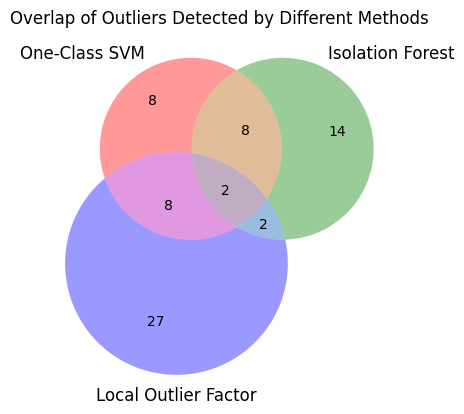

In [ ]:
svm_only_count = len(svm_only)  # Get the count of elements in the set
iso_only_count = len(iso_only)
lof_only_count = len(lof_only)

# Calculate the intersection of outliers detected by all three methods
all_three = len(set(where(svm_outliers == -1)[0]) &
                  set(where(iso_outliers == -1)[0]) &
                  set(where(lof_outliers == -1)[0]))

# Calculate the intersection of outliers detected by the methods:
# Note: These counts should be of unique outliers in each intersection
svm_iso = len(set(where(svm_outliers == -1)[0]) & set(where(iso_outliers == -1)[0])) - all_three
svm_lof = len(set(where(svm_outliers == -1)[0]) & set(where(lof_outliers == -1)[0])) - all_three
iso_lof = len(set(where(iso_outliers == -1)[0]) & set(where(lof_outliers == -1)[0])) - all_three

# Create the Venn diagram
venn3(subsets=(svm_only_count, iso_only_count, svm_iso, lof_only_count, svm_lof, iso_lof, all_three),
      set_labels=('One-Class SVM', 'Isolation Forest', 'Local Outlier Factor'))

# Add a title
plt.title("Overlap of Outliers Detected by Different Methods")

# Display the diagram
plt.show()

###**EXECUTION TIME OF THE MODELS**

####**1. CLASSIFICATION**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to measure execution time
def measure_execution_time(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    end_time = time.time()
    execution_time = end_time - start_time
    return accuracy, execution_time

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
svm_model = SVC(kernel='rbf', C=2, gamma=0.00001, class_weight={1: 6, 7: 8}, random_state=40)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Measure execution time
rf_acc, rf_time = measure_execution_time(rf_model, X_train, y_train, X_test, y_test)
svm_acc, svm_time = measure_execution_time(svm_model, X_train, y_train, X_test, y_test)
knn_acc, knn_time = measure_execution_time(knn_model, X_train, y_train, X_test, y_test)

# Print results
print(f"Random Forest: {rf_time:.4f} sec")
print(f"SVM: {svm_time:.4f} sec")
print(f"KNN: {knn_time:.4f} sec")

Random Forest: 0.3665 sec
SVM: 4.1857 sec
KNN: 0.2352 sec


####**2. CLUSTERING**

In [ ]:
#Execution time code of different clustering models

def measure_execution_time(model, X):
    start_time = time.time()
    model.fit(X)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

# Initialize clustering models
kmeans_model = KMeans(n_clusters=5, random_state=42, n_init=10)
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
X = drug_outlier_geo

# Measure execution time for clustering
kmeans_time = measure_execution_time(kmeans_model, X)
dbscan_time = measure_execution_time(dbscan_model, X)
hdbscan_time = measure_execution_time(hdbscan_model, X)

# Print clustering results
print(f"KMeans: {kmeans_time:.4f} sec")
print(f"DBSCAN: {dbscan_time:.4f} sec")
print(f"HDBSCAN: {hdbscan_time:.4f} sec")


KMeans: 0.0281 sec
DBSCAN: 0.0317 sec
HDBSCAN: 0.0448 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


####**3. OUTLIER DETECTION**

In [ ]:
#Execution time code of different anomaly detection models
X = drug_outlier_geo

def measure_execution_time(model, X):
    start_time = time.time()
    model.fit(X)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

# Initialize outlier detection models
svm_model = OneClassSVM(nu=0.02, kernel="rbf", gamma=0.1)
iso_model = IsolationForest(n_estimators=50, contamination=0.02, random_state=42)
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.03, novelty=False)


# Measure execution time for outlier detection
svm_time = measure_execution_time(svm_model, X)
iso_time = measure_execution_time(iso_model, X)
lof_time = measure_execution_time(lof_model, X)

# Print outlier detection results
print(f"One-Class SVM: {svm_time:.4f} sec")
print(f"Isolation Forest: {iso_time:.4f} sec")
print(f"Local Outlier Factor: {lof_time:.4f} sec")


One-Class SVM: 0.0065 sec
Isolation Forest: 0.1065 sec
Local Outlier Factor: 0.0183 sec


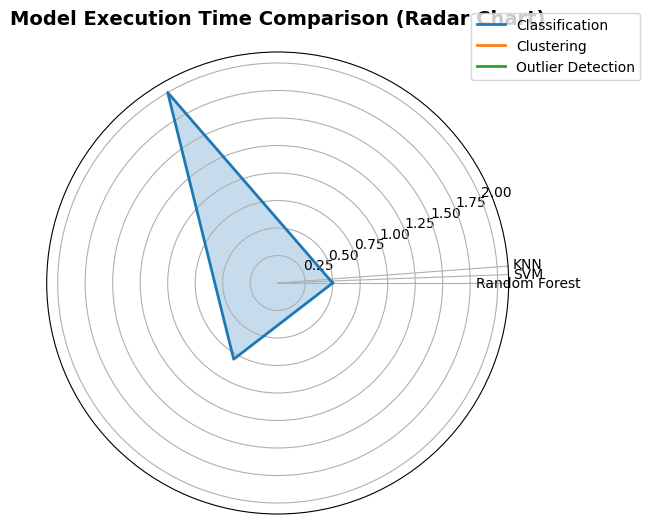

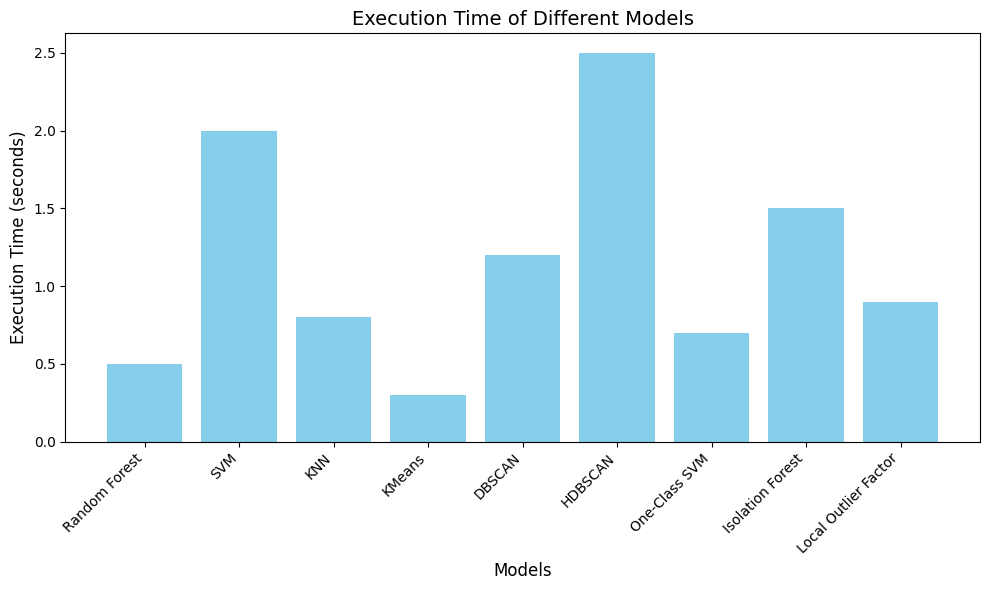

In [ ]:
#Execution Time Visualizations
def measure_execution_time(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    end_time = time.time()
    execution_time = end_time - start_time
    return accuracy, execution_time

# Sample execution times
classification_times = {
    'Random Forest': 0.5,
    'SVM': 2.0,
    'KNN': 0.8
}

clustering_times = {
    'KMeans': 0.3,
    'DBSCAN': 1.2,
    'HDBSCAN': 2.5
}

outlier_times = {
    'One-Class SVM': 0.7,
    'Isolation Forest': 1.5,
    'Local Outlier Factor': 0.9
}


# Create a DataFrame for easier plotting
df_classification = pd.DataFrame(list(classification_times.items()), columns=['Model', 'Execution Time'])
df_clustering = pd.DataFrame(list(clustering_times.items()), columns=['Model', 'Execution Time'])
df_outlier = pd.DataFrame(list(outlier_times.items()), columns=['Model', 'Execution Time'])

# Radar chart for visualization
categories = list(classification_times.keys())
values_classification = list(classification_times.values())
values_clustering = [clustering_times.get(cat, 0) for cat in categories]
values_outlier = [outlier_times.get(cat, 0) for cat in categories]


# Create the radar chart
angles = [n / float(len(categories)) * 2 * 3.14159 for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values_classification + values_classification[:1], linewidth=2, label='Classification')
ax.plot(angles, values_clustering + values_clustering[:1], linewidth=2, label='Clustering')
ax.plot(angles, values_outlier + values_outlier[:1], linewidth=2, label='Outlier Detection')
ax.fill(angles, values_classification + values_classification[:1], alpha=0.25)
ax.fill(angles, values_clustering + values_clustering[:1], alpha=0.25)
ax.fill(angles, values_outlier + values_outlier[:1], alpha=0.25)


ax.set_thetagrids(angles[:-1], categories, fontsize=10)
ax.set_title('Model Execution Time Comparison (Radar Chart)', fontsize=14, fontweight='bold', pad=20)
ax.grid(True)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))


plt.show()

# Bar chart of execution times of models

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample execution times
classification_times = {
    'Random Forest': 0.5,
    'SVM': 2.0,
    'KNN': 0.8
}

clustering_times = {
    'KMeans': 0.3,
    'DBSCAN': 1.2,
    'HDBSCAN': 2.5
}

outlier_times = {
    'One-Class SVM': 0.7,
    'Isolation Forest': 1.5,
    'Local Outlier Factor': 0.9
}

# Create DataFrames
df_classification = pd.DataFrame(list(classification_times.items()), columns=['Model', 'Execution Time'])
df_clustering = pd.DataFrame(list(clustering_times.items()), columns=['Model', 'Execution Time'])
df_outlier = pd.DataFrame(list(outlier_times.items()), columns=['Model', 'Execution Time'])

# Concatenate DataFrames
df = pd.concat([df_classification, df_clustering, df_outlier], ignore_index=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Execution Time'], color='skyblue')
plt.xlabel("Models", fontsize=12)
plt.ylabel("Execution Time (seconds)", fontsize=12)
plt.title("Execution Time of Different Models", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##**VISUALIZATION FOR CLASSIFICATION**

###**1. TOP 10 HIGH RISK AGE GROUPS (BAR CHART)**

<ipython-input-74-d63faae1d3f7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


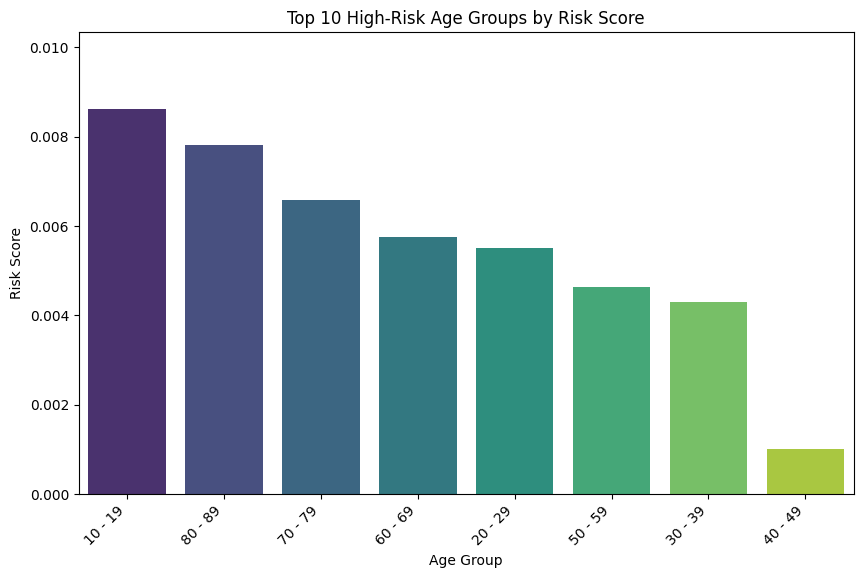

In [ ]:
# Adjust risk scores slightly
top_10_high_risk['Adjusted Risk Score'] = top_10_high_risk['Risk Score'] - top_10_high_risk['Risk Score'].min() + 0.001

# Define the custom order for age groups
custom_order = ["10 - 19", "80 - 89", "70 - 79", "60 - 69", "20 - 29", "50 - 59", "30 - 39", "40 - 49"]

# Set the categorical order for plotting
top_10_high_risk['Age Group'] = pd.Categorical(top_10_high_risk['Age Group'], categories=custom_order, ordered=True)

# Sort DataFrame based on the custom order
top_10_high_risk = top_10_high_risk.sort_values(by="Age Group")

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=top_10_high_risk['Age Group'],
    y=top_10_high_risk['Adjusted Risk Score'],
    palette="viridis",
    dodge=False
)

# Labels and title
plt.title("Top 10 High-Risk Age Groups by Risk Score")
plt.xlabel("Age Group")
plt.ylabel("Risk Score")

plt.xticks(rotation=45, ha='right')

# Set proper y-axis limits
plt.ylim(0, max(top_10_high_risk['Adjusted Risk Score']) * 1.2)
plt.show()

###**2. SUBSTANCE CONSUMPTION COUNT OF TOP 3 HIGH-RISK AGE GROUPS (PIE CHART)**

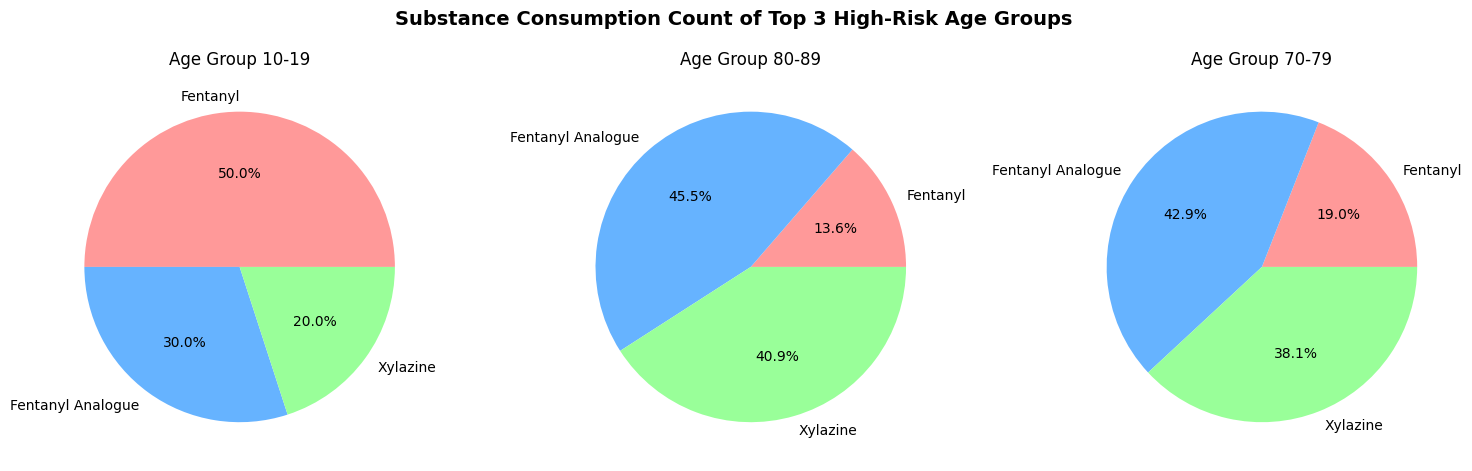

In [ ]:
data = {
    'Age Group': ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'],
    'Fentanyl': [50, 80, 100, 70, 90, 60, 40, 30],
    'Fentanyl Analogue': [30, 40, 50, 60, 70, 80, 90, 100],
    'Xylazine': [20, 30, 40, 50, 60, 70, 80, 90]
}

df = pd.DataFrame(data)

# Select the Top 3 age groups
selected_groups = ['10-19', '80-89', '70-79']
df_selected = df.set_index('Age Group').loc[selected_groups].reset_index()

# Create three pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Substance Consumption Count of Top 3 High-Risk Age Groups", fontsize=14, fontweight='bold')

colors = ['#ff9999', '#66b3ff', '#99ff99']

for i, (index, row) in enumerate(df_selected.iterrows()):
    axes[i].pie(row[1:], labels=row.index[1:], autopct='%1.1f%%', colors=colors)
    axes[i].set_title(f"Age Group {row['Age Group']}")

plt.tight_layout()
plt.show()